# EDA #

1. Basic: Number of teachers, schools
1. Basic: Teacher retention per region
1. Public Teacher: General, Demographic information 
    - gender, gender, race/ethnicity
    - 🔥**(NEW!)** marriage, earning, dependents, union
1. Public Teacher: Education and Training 
    - degree, major(STEM)
    - 🔥**(NEW!)** certificaiton
1. Public Teacher: Teaching Experience
    - years, new teacher, subjects(STEM), grades
    - 🔥**(NEW!)** class organization, full-time/part-time
1. Public School: General information 
    - type, level, urbanicity, minority students
    - 🔥**(NEW!)** minority teachers, student-teacher Ratio
1. Public School: Poverty Proxy 
    - Title 1
    - 🔥**(NEW!)** FRPL, NLP
1. Public Principal: Demographic information 
    - age, race/ethnicity
    - 🔥**(NEW!)** gender, degree, salary
1. Public Principal: Teaching and Training
    - years of experience
1. 🔥**(NEW!)** Public District (available from Public School): Incentive Policy

## List of variables - T2, T3, S4A, S3A, S2A ##
- concat T2 and T3 into df only when 'SECTOR'=='B'(public)
    - `CNTLNUM`, `SCHCNTL`, `SECTOR`, `GENDER`, `F0195`, `F0196`, `F0197`, `FTPT_S`, `label`(0: Former, 1: Current)
- join S4A(Public Teachers) to df matching `SCHCNTL` and `CNTLNUM_T`
    -  `CNTLNUM`, `SCHCNTL`, `AGE_T`, `RACETH_T`, `T0072`, `T0081`, `T0070`, `T0080`, `T0084`, `T0087`, `T0090`, `T0093`, `T0096`, `T0099`, `NEWTCH`, `TOTEXPER`, `T0102`, `T0191`, `T0192`, `T0065`, `T0082`, `T0193`, `T0066`, `T0067`, `T0068`, `T0069`, `T0194`, `T0195`, `T0196`, `T0120`, `T0197`, `T0179`, `T0198`, `T0199`, `T0180`, `T0200`, `T0181`, `T0201`, `T0182`, `T0206`, `T0202`, `T0209`, `T0210`, `T0211`, `T0212`, `T0273`, `T0339`, `T0340`, `T0341`, `T0343`, `T0345`, `T0347`, `T0348`, `T0350`, `T0352`, `T0183`, `T0184`, `T0203`, `T0204`, `T0205`, `MINTCH`, `EARNALL`, `EARNSCH`, `T0103`, `T0104`, `STU_TCH`, `T0355`
- join S3A(Public Schools) to df matching `SCHCNTL`
    -  `SCHCNTL`, `PGMTYPE`, `SCHLEVEL`, `MINENR`, `S0288`, `S0290`, `S0306`, `S0307`, `S0308`, `URBANIC`, `REGION`, `S0282`, `S0283`, `S0284`, `S0285`, `S0286`, `S0287`, `S1611`, `S1612`, `S1613`, `S1614`, `S1615`, `S1616`, `S1617`, `S1618`, `S1619`, `S1620`, `S1621`, `S1622`, `S1623`, `S1624`, `S1625`, `S1626`, `S1627`, `S0265`, `S0266`, `S0267`, `S0268`, `S0269`, `S0270`, `S0271`, `S0272`, `S0273`, `S0274`, `S0275`, `S0276`
- join S2A(Public Principals) to df matching `SCHCNTL`
    - `CNTLNUM`, `SCHCNTL`, `AGE_P`, `RACETH_P`, `A0053`, `A0054`, `A0055`, `A0056`, `A0225`, `A0226`, `A0227`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/data_clean/SASS_99_00_T2_T3_S4A_S3A_S2A.csv', sep=',', header=0)
df['TFS']=df['label'].apply(lambda x: 'Former' if x==0 else 'Current')

## Basic: Number of teachers, schools ##

In [3]:
print('Total number of teachers: ',df.CNTLNUM_T.nunique())
print('Former teachers : Current teachers =',df.label.value_counts()[0], ':',df.label.value_counts()[1])
print('Total number of schools: ',df.SCHCNTL.nunique())
teacher_per_school=df.groupby(['SCHCNTL'], as_index=False).agg({'CNTLNUM_T': 'count'})
print('Average number of teachers per school: {:0.2f}'.format(teacher_per_school.CNTLNUM_T.mean()))

Total number of teachers:  3640
Former teachers : Current teachers = 1464 : 2176
Total number of schools:  2838
Average number of teachers per school: 1.28


## Basic: Teacher retention per region ##

In [4]:
category={1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'}
df['region_txt']=df['REGION'].map(category)
fig_index=1

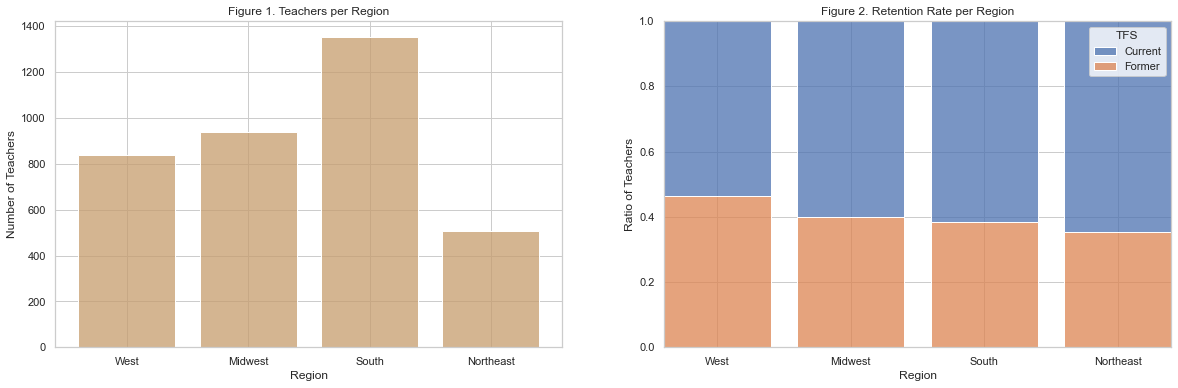

In [5]:
# sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='deep')

fig, axes=plt.subplots(1,2, figsize=(20,6))
sns.histplot(ax=axes[0], data=df, x='region_txt', shrink=0.8, color='#c69c6d')
axes[0].set(xlabel='Region', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Teachers per Region')
fig_index+=1
sns.histplot(ax=axes[1], data=df, x='region_txt',hue='TFS', multiple='fill', hue_order=['Current', 'Former'], shrink=0.8)
axes[1].set(xlabel='Region', ylabel='Ratio of Teachers', title='Figure '+str(fig_index)+'. Retention Rate per Region')
fig_index+=1
plt.show()

- Figure 1: the distirubtion of the number of teachers per each region, West, Midwest, Soudth, and, Northeast indicates the the survey has teachers working at South the most as its respoendants.

- Figure 2: the ratio of teachers turnover in each region shows that West region is the highest and Midwest > South > Northeast are following.

## Public Teacher: Demographic information ##
### gender, gender, race/ethnicity ### 

In [6]:
df['gender_txt']=df['GENDER'].apply(lambda x: 'Male' if x==1 else 'Female')
gender=df.groupby(['gender_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
gender['total']=gender.groupby('gender_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={1: '< 30', 2: '30-39', 3: '40-49', 4: '>= 50'}
df['age_txt']=df['AGE_T'].map(category)
age=df.groupby(['age_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
age['total']=age.groupby('age_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={1: 'American Indian', 2: 'Asian', 3: 'Black', 4: 'White', 5: 'Hispanic'}
df['race_txt']=df['RACETH_T'].map(category)

category={1: 'Non-White', 2: 'Non-White', 3: 'Non-White', 4: 'White', 5: 'Non-White'}
df['white_txt']=df['RACETH_T'].map(category)
white=df.groupby(['white_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
white['total']=white.groupby('white_txt').transform(lambda x: x.sum())['CNTLNUM_T']

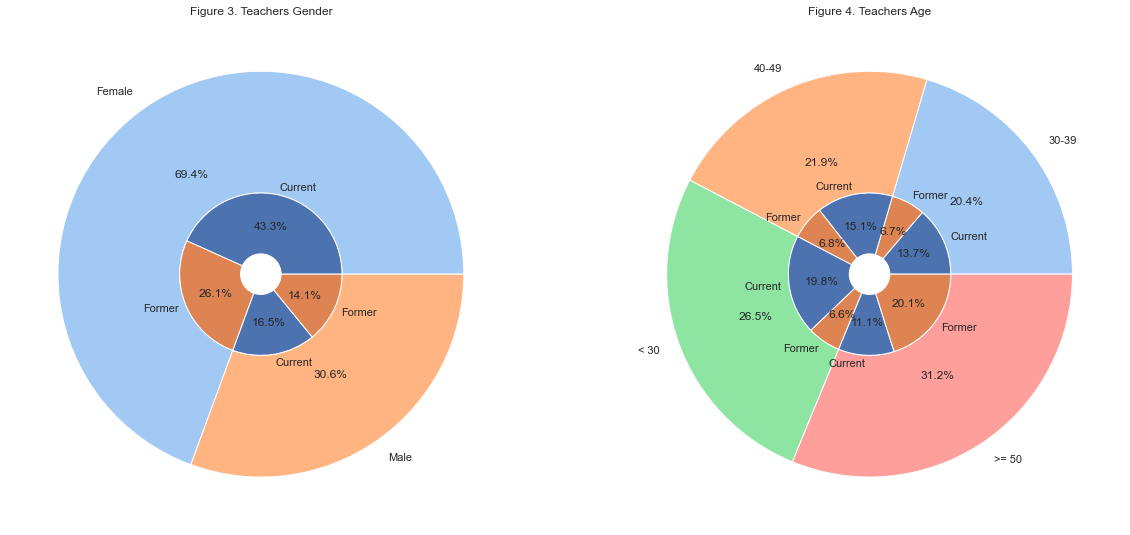

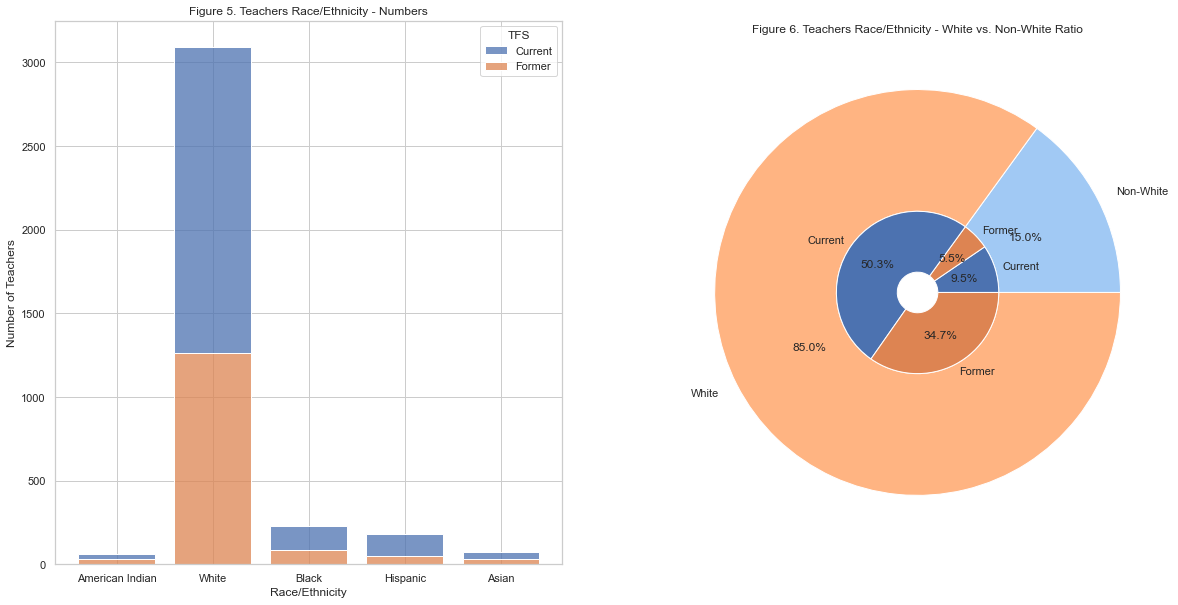

In [7]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('pastel')[:gender.gender_txt.nunique()]
axes[0].pie(gender.total.unique().tolist(), labels=gender.gender_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(gender.CNTLNUM_T.tolist(), labels=gender.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Gender')
fig_index+=1

colors=sns.color_palette('pastel')[:age.age_txt.nunique()]
axes[1].pie(age.total.unique().tolist(), labels=age.age_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(age.CNTLNUM_T.tolist(), labels=age.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Age')
fig_index+=1

fig, axes=plt.subplots(1,2, figsize=(20,10))
sns.histplot(ax=axes[0], data=df, x='race_txt', hue='TFS', multiple='stack', hue_order=['Current', 'Former'], shrink=0.8)
axes[0].set(xlabel='Race/Ethnicity', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Teachers Race/Ethnicity - Numbers')
fig_index+=1

colors=sns.color_palette('pastel')[:white.white_txt.nunique()]
axes[1].pie(white.total.unique().tolist(), labels=white.white_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(white.CNTLNUM_T.tolist(), labels=white.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Race/Ethnicity - White vs. Non-White Ratio')
fig_index+=1

plt.show()

- Figure 3: with the number of teachers, Current and Former, per gender, female teachers are around 2/3 of the teacher population, but the turnover is higher among the male teachers. 

- Figure 4: the age distribution of the teachers shows the teachers who are 50+ years are the majority of the teacher population and also the most likely quitting their job.

- Figure 5: the race categories except Hispanic are non-hispanic in this figure. White is the majority of the teachers.

- Figure 6: Figure 5 has been regenerated into White vs. Non-White ratio of teachers. The teachers ratention rate is higher for Non-White teachers.

  ### 🔥 (NEW!): marriage, salary, dependents, union ###

In [8]:
category={1: 'Married', 2: 'Widowed, \ndivorced, or separated', 3: 'Never married'}
df['marital_txt']=df['F0195'].map(category)
marital=df.groupby(['marital_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
marital['total']=marital.groupby('marital_txt').transform(lambda x: x.sum())['CNTLNUM_T']

EARNALL=df.groupby(['EARNALL', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
EARNALL['total']=EARNALL.groupby('EARNALL').transform(lambda x: x.sum())['CNTLNUM_T']

EARNSCH=df.groupby(['EARNSCH', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
EARNSCH['total']=EARNSCH.groupby('EARNSCH').transform(lambda x: x.sum())['CNTLNUM_T']

labels=['< $30,000', '\$30,000-$39,999', '\$40,000-$49,999', '>= $50,000']

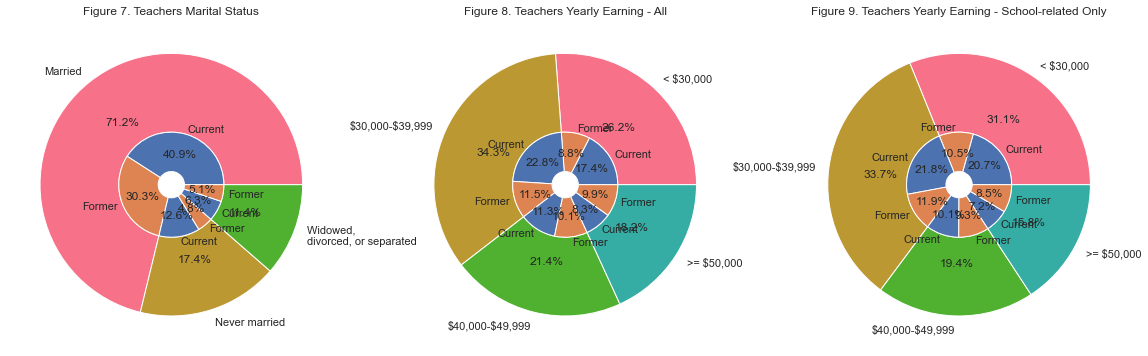

In [9]:
fig, axes=plt.subplots(1,3, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:marital.marital_txt.nunique()]
axes[0].pie(marital.total.unique().tolist(), labels=marital.marital_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(marital.CNTLNUM_T.tolist(), labels=marital.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Marital Status')
fig_index+=1

colors=sns.color_palette('husl')[:EARNALL.EARNALL.nunique()]
axes[1].pie(EARNALL.total.unique().tolist(), labels=labels, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(EARNALL.CNTLNUM_T.tolist(), labels=EARNALL.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Yearly Earning - All')
fig_index+=1

colors=sns.color_palette('husl')[:EARNSCH.EARNSCH.nunique()]
axes[2].pie(EARNSCH.total.unique().tolist(), labels=labels, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[2].pie(EARNSCH.CNTLNUM_T.tolist(), labels=EARNSCH.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[2].set(title='Figure '+str(fig_index)+'. Teachers Yearly Earning - School-related Only')
fig_index+=1

plt.show()

- Figure 7: Marital status asked when the TFS survey occurred shows Never married teachers have the highest retention rate. 

- Figure 8: Including all teaching-related and non-teaching jobs, teachers earning less than $40k have higher retention rate. 

- Figure 9: Including only teaching base salary and school/teaching related jobs, teachers earning less than $40k have higher retention rate.


In [10]:
# category={0: 0, 1: 1, 2: 1, 3: 3, 4: 4, 5: 5, 6: 6, 7: '7 or more', 8: '7 or more', 10: '7 or more', 12: '7 or more'}
category={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: '5 or more', 6: '5 or more', 7: '5 or more', 8: '5 or more', 10: '5 or more', 12: '5 or more'}
df['dependents_txt']=df['F0196'].map(category)
dependents=df.groupby(['dependents_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
dependents['total']=dependents.groupby('dependents_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={0: 0, 1: 1, 2: 2, 3: '3 or more', 4: '3 or more', 5: '3 or more'}
df['under_5_txt']=df['F0197'].map(category)
under_5=df.groupby(['under_5_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
under_5['total']=under_5.groupby('under_5_txt').transform(lambda x: x.sum())['CNTLNUM_T']

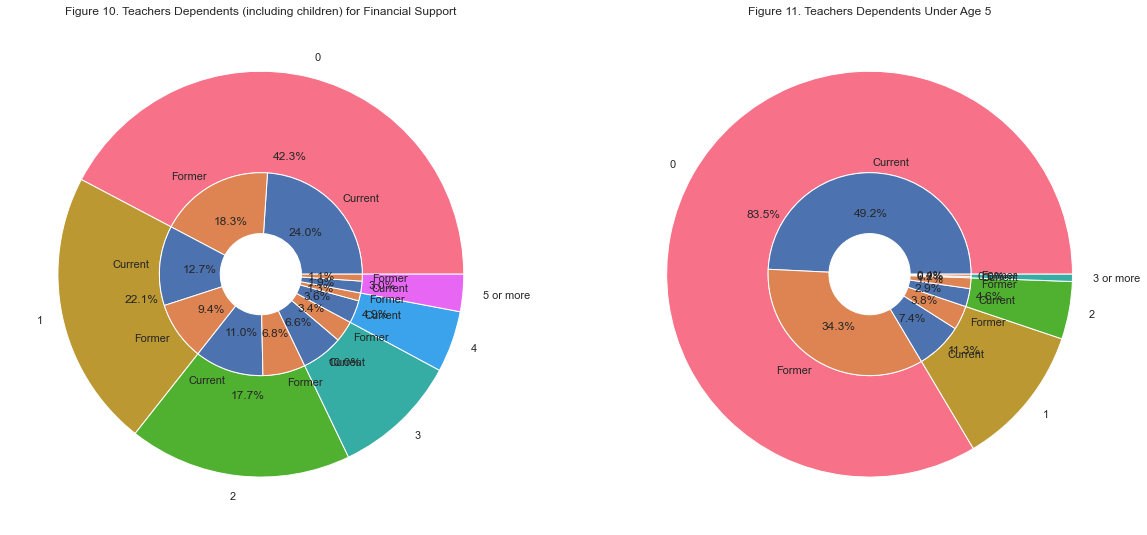

In [11]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.5

colors=sns.color_palette('husl')[:dependents.dependents_txt.nunique()]
axes[0].pie(dependents.total.unique().tolist(), labels=dependents.dependents_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(dependents.CNTLNUM_T.tolist(), labels=dependents.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Dependents (including children) for Financial Support')
fig_index+=1

colors=sns.color_palette('husl')[:under_5.under_5_txt.nunique()]
axes[1].pie(under_5.total.unique().tolist(), labels=under_5.under_5_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(under_5.CNTLNUM_T.tolist(), labels=under_5.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Dependents Under Age 5')
fig_index+=1


- Figure 10: As the number of persons depending on teachers for more than half of their financial support increases, the retention rate increases as well. 

- Figure 11: As the number of children who are under 5 years old increases, the retention rate increases as well. 

In [12]:
union=df.groupby(['T0355', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
union['total']=union.groupby('T0355').transform(lambda x: x.sum())['CNTLNUM_T']

union_ag=df.groupby(['COLBARG', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
union_ag['total']=union_ag.groupby('COLBARG').transform(lambda x: x.sum())['CNTLNUM_T']
labels=['N/A', 'No', 'Yes:Meet-and-Confer', 'Yes:Collective Barganing']

In [13]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:union.T0355.nunique()]
axes[0].pie(union.total.unique().tolist(), labels=['Yes', 'No'], colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(union.CNTLNUM_T.tolist(), labels=union.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Union Member')
fig_index+=1

colors=sns.color_palette('husl')[:union_ag.COLBARG.nunique()]
axes[1].pie(union_ag.total.unique().tolist(), labels=labels, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(union_ag.CNTLNUM_T.tolist(), labels=union_ag.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. District and Union Agreement')
fig_index+=1

- Figure 12: More than 2/3 of teachers are a union member. The ratio of Current and Former teachers is not showing significant change between union or non-union teachers.

- Figure 13: The retention rate is similar regardless of the type of District and Union agreement, Meet-and-Confer and Collective Bargaining. 


## Public Teacher: Education and Training ##
### certification, degree, major ###

In [14]:
category={1: 'Bachelors+Masters', 2: 'Bachelors Only', -8: 'No Bachelors'}
df['degree_txt']=df['T0080'].map(category)
degree=df.groupby(['T0070', 'degree_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
degree['total_bach']=degree.groupby('T0070').transform(lambda x: x.sum())['CNTLNUM_T']
degree['total_master']=degree.groupby('degree_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={1: 'Regular/Standard/Advanced', 2: 'Probationary', 3: 'Provisional', 4: 'Temporary', 5: 'Emergency/Waiver', -8: 'No Certification'}
cert=df.groupby(['T0104', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
cert['total']=cert.groupby('T0104').transform(lambda x: x.sum())['CNTLNUM_T']
cert['T0104']=cert['T0104'].map(category)

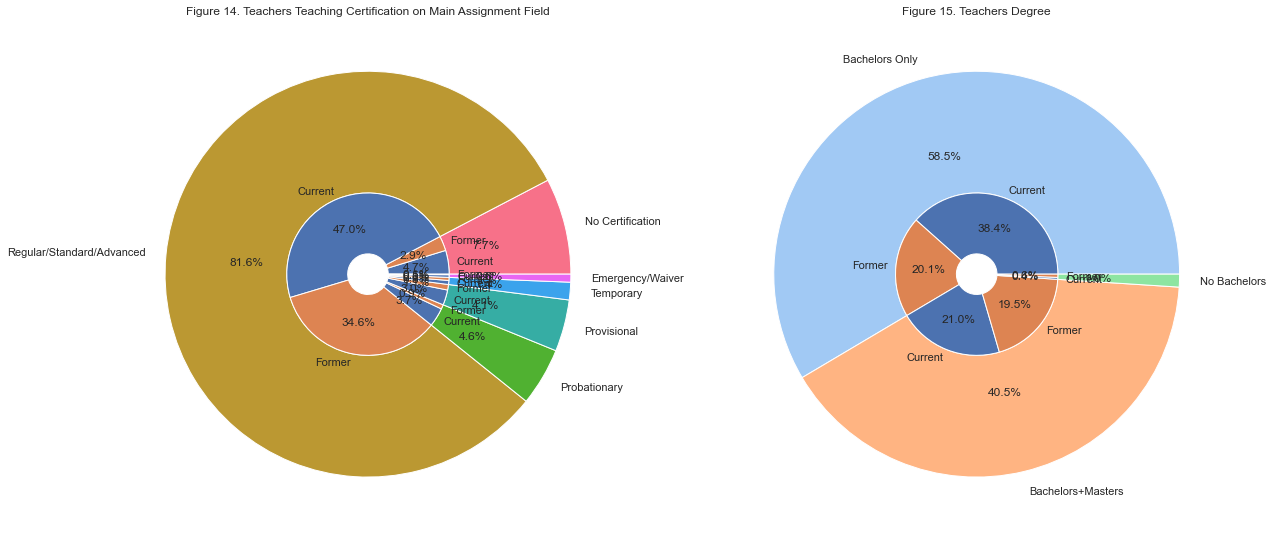

In [15]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:cert.T0104.nunique()]
axes[0].pie(cert.total.unique().tolist(), labels=cert.T0104.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(cert.CNTLNUM_T.tolist(), labels=cert.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Teaching Certification on Main Assignment Field')
fig_index+=1

colors=sns.color_palette('pastel')[:degree.degree_txt.nunique()]
axes[1].pie(degree.total_master.unique().tolist(), labels=degree.degree_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(degree.CNTLNUM_T.tolist(), labels=degree.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Degree')
fig_index+=1

plt.show()

- Figure 14: Over 80% of teachers have a Regular, Standard, or Advance certification on their main assignment field of study. But the rest of teachers having other or no certification have higher ratio of Current teachers.

- Figure 15: There are 10 questions related to teachers degree in the survey - 1st field of bachelor's, 2nd field of bachelor's, minor, master's, associate, 2nd bachelor's, 2nd master's, education special, advanced graduate certificate, and PhD. More than half of teachers have only bachelor's degree, and 40.5% of the teachers have Bachelor's and Master's degree. Also, the retention rate is higher the Bachelors-Only holders.

In [16]:
category={1: 'Education', 2: 'Education', 3: 'Education', 4: 'Education', 5: 'Education', 6: 'Education', 7: 'Education', 8: 'Education', 9: 'Education', 10: 'Education', 11: 'Education', 12: 'Education', 13: 'Education', 14: 'Education', 15: 'Education', 16: 'Education', 17: 'Education', 18: 'Education', 19: 'Education', 20: 'Education', 21: 'Education', 22: 'Education', 23: 'Education', 24: 'Education', 25: 'Education', 26: 'Education', 27: 'Education', 28: 'Education', 29: 'Education', 30: 'Education', 31: 'Education', 32: 'Education', 33: 'Education', 34: 'Education', 35: 'Education', 36: 'Education', 37: 'Education', 38: 'Education', 39: 'Education', 40: 'Education', 41: 'Education', 42: 'Education', 43: 'Education', 44: 'Education', 45: 'General - Non-STEM', 46: 'General - Non-STEM', 47: 'General - Non-STEM', 48: 'General - Non-STEM', 49: 'General - Non-STEM', 50: 'General - Non-STEM', 51: 'General - Non-STEM', 52: 'General - Non-STEM', 53: 'General - Non-STEM', 54: 'General - Non-STEM', 55: 'General - Non-STEM', 56: 'General - Non-STEM', 57: 'General-STEM', 58: 'General-STEM', 59: 'General-STEM', 60: 'General-STEM', 61: 'General-STEM', 62: 'General-STEM', 63: 'General-STEM', 64: 'General - Non-STEM', 65: 'General - Non-STEM', 66: 'General - Non-STEM', 67: 'General - Non-STEM', 68: 'General - Non-STEM', 69: 'General - Non-STEM', 70: 'General - Non-STEM', 71: 'General - Non-STEM', 72: 'General - Non-STEM', 73: 'General - Non-STEM', 74: 'General - Non-STEM', 75: 'General - Non-STEM', 76: 'General - Non-STEM', 77: 'General - Non-STEM', 78: 'General - Non-STEM', 79: 'General - Non-STEM', 80: 'General - Non-STEM', 81: 'General - Non-STEM', 82: 'General - Non-STEM', 83: 'General - Non-STEM', 84: 'General - Non-STEM', 85: 'General - Non-STEM', 86: 'General - Non-STEM', 87: 'General - Non-STEM', 88: 'All Other Areas'}
df['major_bach']=df['T0072'].map(category)
major_bach=df.groupby(['major_bach', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
major_bach['total']=major_bach.groupby('major_bach').transform(lambda x: x.sum())['CNTLNUM_T']

df['major_master']=df['T0081'].map(category)
major_master=df.groupby(['major_master', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
major_master['total']=major_master.groupby('major_master').transform(lambda x: x.sum())['CNTLNUM_T']

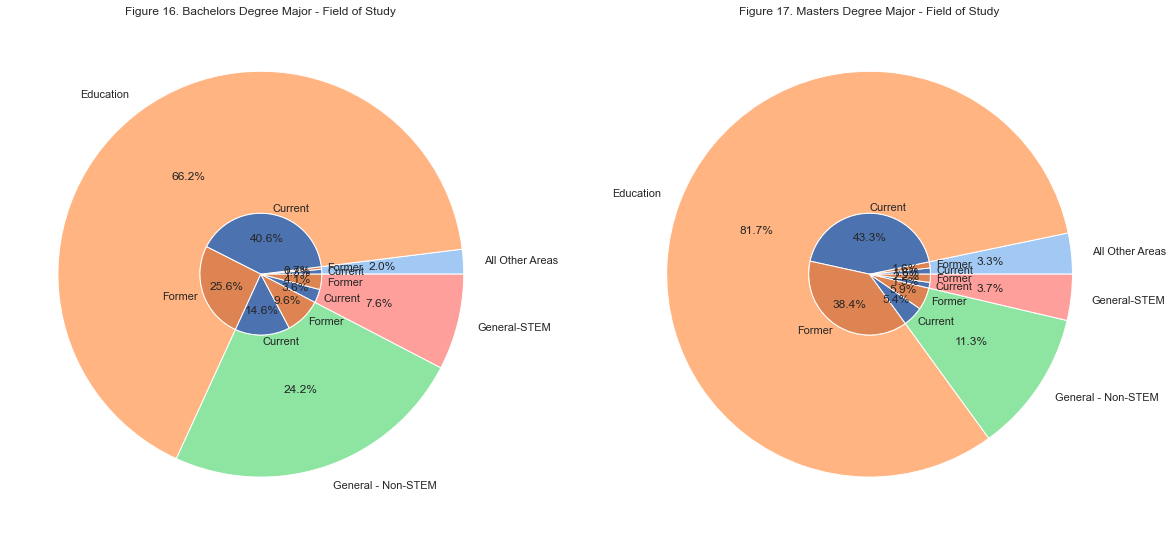

In [17]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('pastel')[:major_bach.major_bach.nunique()]
axes[0].pie(major_bach.total.unique().tolist(), labels=major_bach.major_bach.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(major_bach.CNTLNUM_T.tolist(), labels=major_bach.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Bachelors Degree Major - Field of Study')
fig_index+=1

colors=sns.color_palette('pastel')[:major_master.major_master.nunique()]
axes[1].pie(major_master.total.unique().tolist(), labels=major_master.major_master.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(major_master.CNTLNUM_T.tolist(), labels=major_master.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Masters Degree Major - Field of Study')
fig_index+=1

plt.show()

Figure 16 and 17 shows the degree categories of Bechelor's and Master's degree respetively. The survey has 88 different codes for the filed of study that are recagorized as Education, STEM, or Non-STEM. 
As the teachers pursue their Master's degree, they tend to study Education - Other, Counseling and guidance, Curriculum and instruction, Educational administration/psychology, and Education - Special related to disabled students and mental health. STEM major teachers are likely leaving the job regardless of the degree.

## Public Teacher: Teaching Experience ##
### years, new teacher, subjects(STEM), grades ### 

In [18]:
df['newtch_txt']=df['NEWTCH'].apply(lambda x: '3 years or less' if x==1 else 'more than 3 years')
newtch=df.groupby(['newtch_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
newtch['total']=newtch.groupby('newtch_txt').transform(lambda x: x.sum())['CNTLNUM_T']

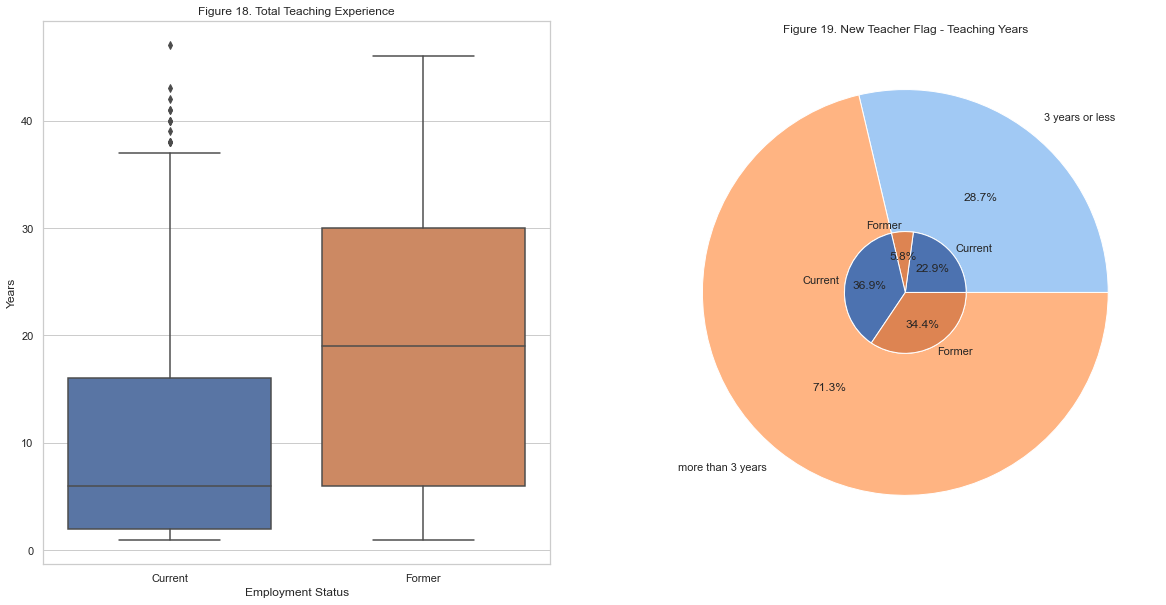

In [19]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7
sns.boxplot(ax=axes[0], data=df, x='TFS', y='TOTEXPER', order=['Current', 'Former'])
axes[0].set(xlabel='Employment Status', ylabel='Years', title='Figure '+str(fig_index)+'. Total Teaching Experience')
fig_index+=1

colors=sns.color_palette('pastel')[:newtch.newtch_txt.nunique()]
axes[1].pie(newtch.total.unique().tolist(), labels=newtch.newtch_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(newtch.CNTLNUM_T.tolist(), labels=newtch.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. New Teacher Flag - Teaching Years')
fig_index+=1

plt.show()

- Figure 18: Former teachers have longer years of teaching experience than Current teachers.

- Figure 19: Teachers working more than 3 years have significantly higher ratio of Former teachers.

In [20]:
category={1: 'General', 2: 'General', 3: 'General', 4: 'Special Areas', 5: 'Special Areas', 6: 'Special Areas', 7: 'Special Areas', 8: 'Special Areas', 9: 'Special Areas', 10: 'Special Areas', 11: 'Special Areas', 12: 'Special Areas', 13: 'Special Areas', 14: 'Special Areas', 15: 'Special Areas', 16: 'Special Areas', 17: 'Special Areas', 18: 'Special Areas', 19: 'Special Areas', 20: 'Special Areas', 21: 'Special Areas', 22: 'Special Areas', 23: 'English or Language Arts', 24: 'English or Language Arts', 25: 'English or Language Arts', 26: 'Foreign Languages', 27: 'Foreign Languages', 28: 'Foreign Languages', 29: 'Foreign Languages', 30: 'Foreign Languages', 31: 'Foreign Languages', 32: 'Science', 33: 'Science', 34: 'Science', 35: 'Science', 36: 'Science', 37: 'Science', 38: 'Science', 39: 'Vocational-Technical Education', 40: 'Vocational-Technical Education', 41: 'Vocational-Technical Education', 42: 'Vocational-Technical Education', 43: 'Vocational-Technical Education', 44: 'Vocational-Technical Education', 45: 'Vocational-Technical Education', 46: 'Vocational-Technical Education', 47: 'Vocational-Technical Education', 48: 'Vocational-Technical Education', 49: 'Special Education', 50: 'Special Education', 51: 'Special Education', 52: 'Special Education', 53: 'Special Education', 54: 'Special Education', 55: 'Special Education', 56: 'Special Education', 57: 'Special Education', 58: 'Special Education', 59: 'Special Education', 60: 'Special Education', 61: 'Special Education', 62: 'Special Education', 63: 'Special Education', 64: 'All Others'}
df['assign']=df['T0102'].map(category)

category_stem={1: 'Non-STEM', 2: 'Non-STEM', 3: 'Non-STEM', 4: 'Non-STEM', 5: 'Non-STEM', 6: 'Non-STEM', 7: 'Non-STEM', 8: 'Non-STEM', 9: 'Non-STEM', 10: 'Non-STEM', 11: 'Non-STEM', 12: 'Non-STEM', 13: 'Non-STEM', 14: 'Non-STEM', 15: 'Non-STEM', 16: 'STEM', 17: 'Non-STEM', 18: 'Non-STEM', 19: 'Non-STEM', 20: 'Non-STEM', 21: 'Non-STEM', 22: 'Non-STEM', 23: 'Non-STEM', 24: 'Non-STEM', 25: 'Non-STEM', 26: 'Non-STEM', 27: 'Non-STEM', 28: 'Non-STEM', 29: 'Non-STEM', 30: 'Non-STEM', 31: 'Non-STEM', 32: 'STEM', 33: 'STEM', 34: 'STEM', 35: 'STEM', 36: 'STEM', 37: 'STEM', 38: 'STEM', 39: 'Non-STEM', 40: 'Non-STEM', 41: 'Non-STEM', 42: 'Non-STEM', 43: 'Non-STEM', 44: 'Non-STEM', 45: 'Non-STEM', 46: 'Non-STEM', 47: 'Non-STEM', 48: 'Non-STEM', 49: 'Non-STEM', 50: 'Non-STEM', 51: 'Non-STEM', 52: 'Non-STEM', 53: 'Non-STEM', 54: 'Non-STEM', 55: 'Non-STEM', 56: 'Non-STEM', 57: 'Non-STEM', 58: 'Non-STEM', 59: 'Non-STEM', 60: 'Non-STEM', 61: 'Non-STEM', 62: 'Non-STEM', 63: 'Non-STEM', 64: 'Non-STEM'}
df['assign_stem']=df['T0102'].map(category_stem)
assign_stem=df.groupby(['assign_stem', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
assign_stem['total']=assign_stem.groupby('assign_stem').transform(lambda x: x.sum())['CNTLNUM_T']

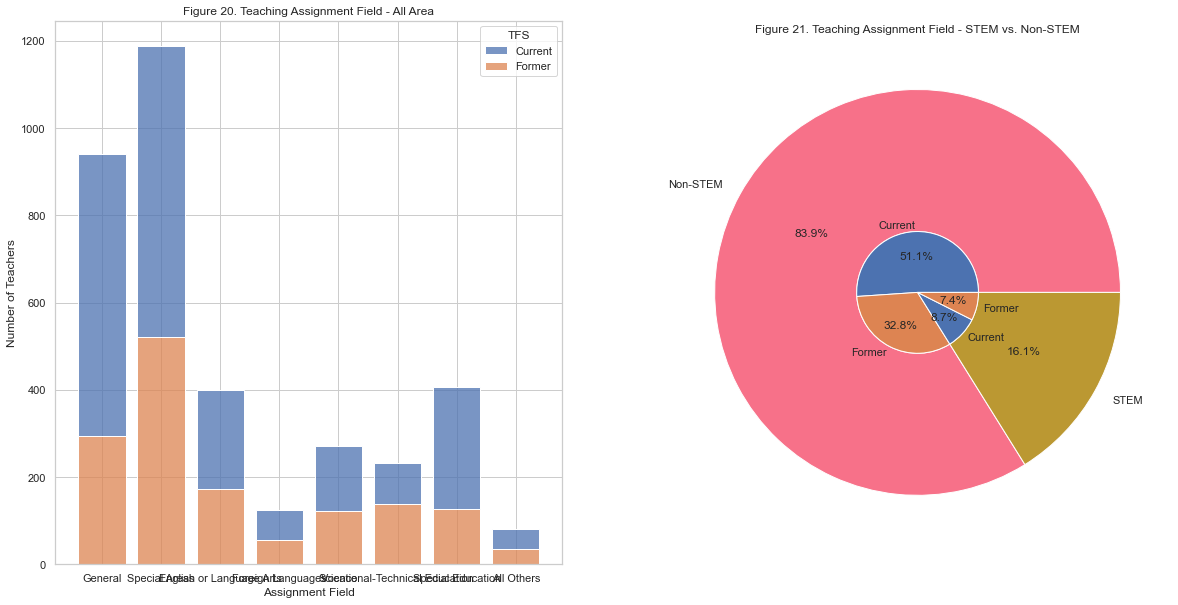

In [21]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

# sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(ax=axes[0], data=df.sort_values(by=['T0102']), x='assign', hue='TFS', multiple='stack', hue_order=['Current', 'Former'], shrink=0.8)
axes[0].set(xlabel='Assignment Field', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Teaching Assignment Field - All Area')
fig_index+=1

colors=sns.color_palette('husl')[:assign_stem.assign_stem.nunique()]
axes[1].pie(assign_stem.total.unique().tolist(), labels=assign_stem.assign_stem.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(assign_stem.CNTLNUM_T.tolist(), labels=assign_stem.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teaching Assignment Field - STEM vs. Non-STEM')
fig_index+=1

plt.show()

- Figure 20: The surey has 64 codes for the teaching assignment field of study that is recategorized into 8 different cateogories. The majority of teachers teach Special Areas including Art, Dance, Music, Mathmatics etc. and General including Pre-K, Kindergarten and Elementary. But, the highest turnover appears for Vocational-Technical education field.

- Figure 21: Figure 20 is recategorized again for STEM vs. non-STEM teachers for their teaching assignemnt field. STEM teachers are small population, 16%, but tend to have higher turnover rate.

In [22]:
cols=['T0191', 'T0192', 'T0193', 'T0194', 'T0195', 'T0196', 'T0197', 'T0198', 'T0199', 'T0200', 'T0201', 'T0202', 'T0203', 'T0204', 'T0205']

def df_sum(x):
    total=[1 for i in range(len(x)) if x[i]==1]
    return sum(total)

df['tch_grade_sum']=df[cols].apply(lambda x: df_sum(x), axis=1)
data=df[cols].apply(lambda x: df_sum(x), axis=0)
labels=['ungraded', 'PK', 'K', '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th']

teacher_per_years=df.groupby(['tch_grade_sum', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

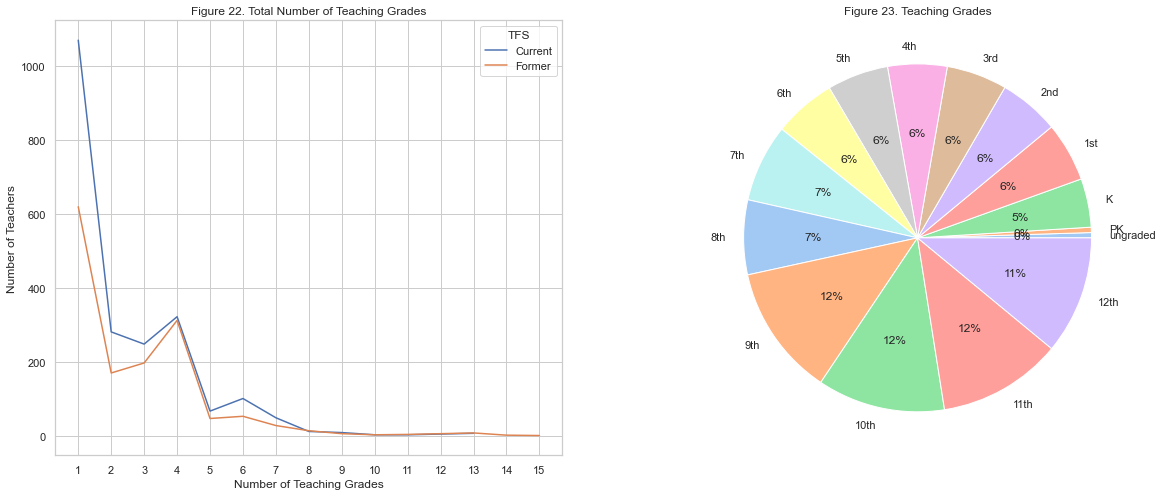

In [23]:
fig, axes=plt.subplots(1,2, figsize=(20,8))
# sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(ax=axes[0], data=teacher_per_years, x='tch_grade_sum', y='CNTLNUM_T', hue='TFS')
axes[0].set(xlabel='Number of Teaching Grades', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Total Number of Teaching Grades')
axes[0].set(xticks=np.sort(df.tch_grade_sum.unique()))
fig_index+=1

colors=sns.color_palette('pastel')[0:15]
axes[1].pie(data, labels=labels, colors=colors, autopct='%.0f%%')
axes[1].set(title='Figure '+str(fig_index)+'. Teaching Grades')
fig_index+=1

plt.show()

- Figure 22: The distribution of theachers as per the number of grades the teachers are teaching shows shows similar pattern for both Current and Former teachers. The majority of teachers teach less than 3 grades at a time. 

- Figure 23: The ratio of teachers teaching each grade are increasing as the grade is going up.

### 🔥 (NEW!): class organization, full-time/part-time ###

In [24]:
category={1: 'Departmentalized', 2: 'Enrichment', 3: 'Self-Contained', 4: 'Team Teaching', 5: 'Pull-Out'}
cla_or=df.groupby(['T0206', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
cla_or['total']=cla_or.groupby('T0206').transform(lambda x: x.sum())['CNTLNUM_T']
cla_or['T0206']=cla_or['T0206'].map(category)

df['ftpt_txt']=df['FTPT_S'].apply(lambda x: 'Full-time' if x==1 else 'Part-time')
ftpt=df.groupby(['ftpt_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
ftpt['total']=ftpt.groupby('ftpt_txt').transform(lambda x: x.sum())['CNTLNUM_T']

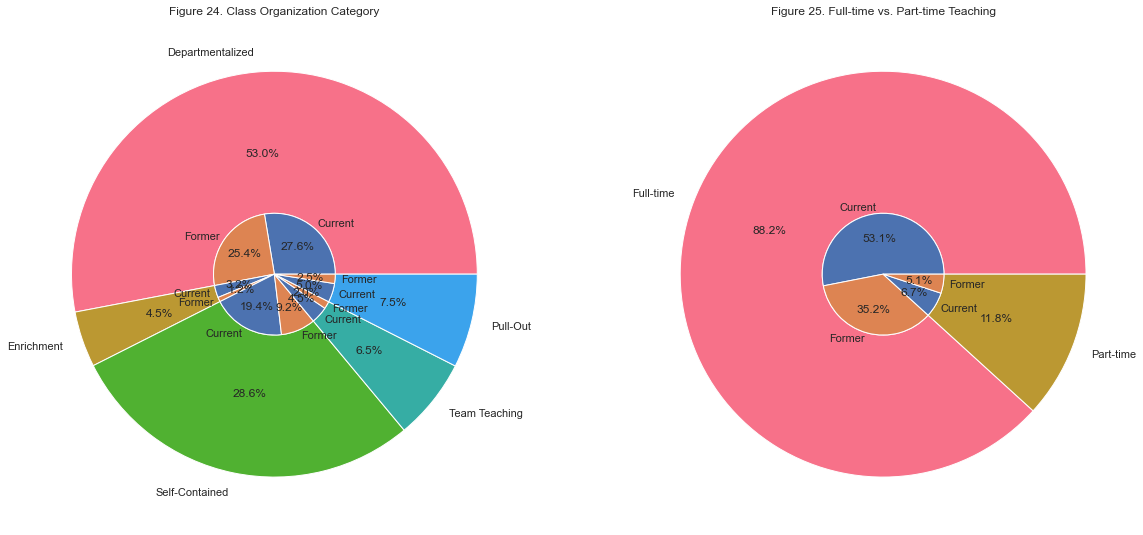

In [25]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:cla_or.T0206.nunique()]
axes[0].pie(cla_or.total.unique().tolist(), labels=cla_or.T0206.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(cla_or.CNTLNUM_T.tolist(), labels=cla_or.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Class Organization Category')
fig_index+=1

colors=sns.color_palette('husl')[:ftpt.ftpt_txt.nunique()]
axes[1].pie(ftpt.total.unique().tolist(), labels=ftpt.ftpt_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(ftpt.CNTLNUM_T.tolist(), labels=ftpt.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Full-time vs. Part-time Teaching')
fig_index+=1

plt.show()

- Figure 24: Teachers teaching specific subject matter courses, Departmentalized Instruction, show lower ratio of Current teachers compare to other types of class organization.

- Figure 25: While almost 90% of teachers are full-time employed, the retention rate is slightly higher for the part-time teachers.

## Public School: General information ##
### type, level, urbanicity ###

In [26]:
category={1: 'Regular', 3: 'Special\nProgram', 4: 'Special\nEducation', 5: 'Vocational/\nTechnical', 6: 'Alternative'}
df['pgmtype_txt']=df['PGMTYPE'].map(category)

category={1: 'Elementary', 2: 'Secondary', 3: 'Combined'}
schlevel=df.groupby(['SCHLEVEL', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
schlevel['total']=schlevel.groupby('SCHLEVEL').transform(lambda x: x.sum())['CNTLNUM_T']
schlevel['SCHLEVEL']=schlevel['SCHLEVEL'].map(category)

category={1: 'Large/mid size\ncentral city', 2: 'Urban fringe of \nlarge/mid-size city', 3: 'Small town/Rural'}
urbanic=df.groupby(['URBANIC', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
urbanic['total']=urbanic.groupby('URBANIC').transform(lambda x: x.sum())['CNTLNUM_T']
urbanic['URBANIC']=urbanic['URBANIC'].map(category)

category={1: 'Less than 5%', 2: '5-19%', 3: '20-49%', 4: '50% or more'}
minenr=df.groupby(['MINENR','TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
minenr['total']=minenr.groupby('MINENR').transform(lambda x: x.sum())['CNTLNUM_T']
minenr['MINENR']=minenr['MINENR'].map(category)

category={1: 'Less than 5%', 2: 'Less than 5%', 3: '5-19%', 4: '20-49%', 5: '50% or more', -9: 'N/A'}
df['mintch_txt']=df['MINTCH'].map(category)
mintch=df.groupby(['mintch_txt','TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
mintch['total']=mintch.groupby('mintch_txt').transform(lambda x: x.sum())['CNTLNUM_T']

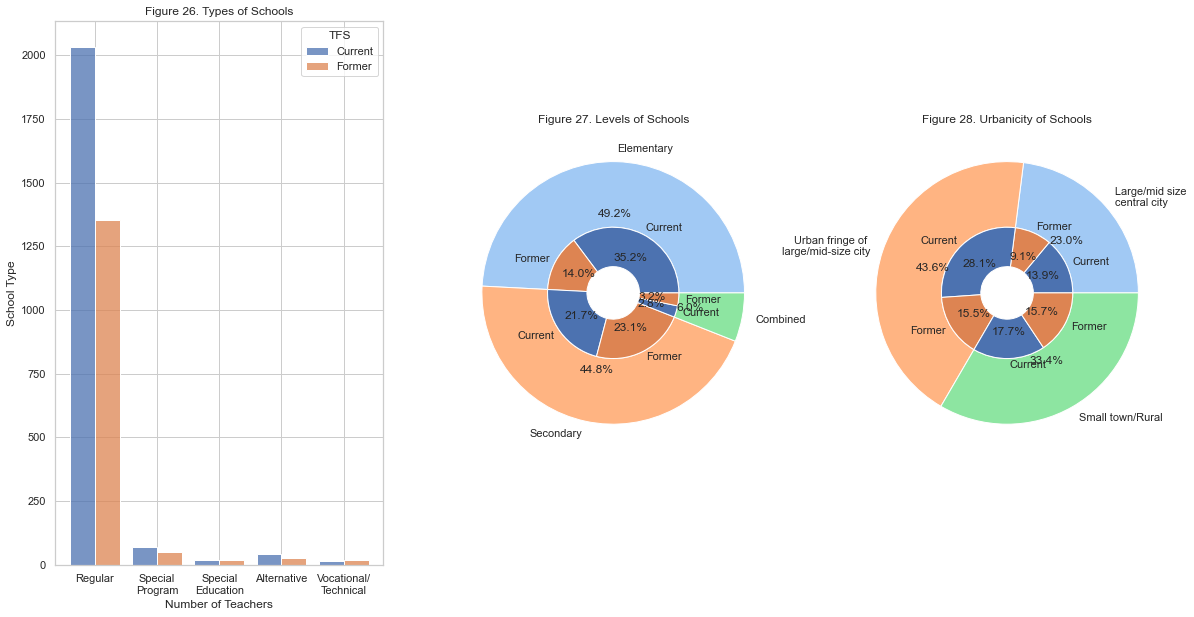

In [27]:
# sns.set(rc={'figure.figsize':(10,10)})
fig, axes=plt.subplots(1,3, figsize=(20,10))
size=0.5
sns.histplot(ax=axes[0], data=df, x='pgmtype_txt',hue='TFS', multiple='dodge', hue_order=['Current', 'Former'], shrink=0.8)
axes[0].set(xlabel='Number of Teachers', ylabel='School Type', title='Figure '+str(fig_index)+'. Types of Schools')
fig_index+=1

colors=sns.color_palette('pastel')[:schlevel.SCHLEVEL.nunique()]
axes[1].pie(schlevel.total.unique().tolist(), labels=schlevel.SCHLEVEL.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(schlevel.CNTLNUM_T.tolist(), labels=schlevel.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Levels of Schools')
fig_index+=1

colors=sns.color_palette('pastel')[:urbanic.URBANIC.nunique()]
axes[2].pie(urbanic.total.unique().tolist(), labels=urbanic.URBANIC.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[2].pie(urbanic.CNTLNUM_T.tolist(), labels=urbanic.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[2].set(title='Figure '+str(fig_index)+'. Urbanicity of Schools')
fig_index+=1

plt.show()

- Figure 26: The most of teachers are working at Regular school, and its Former teacher ratio is also the highest. 

- Figure 27: Teachers working at Secondary schools have more Former teachers than Current teachers. 

- Figure 28: Teachers working at Small town or Rural area have the highest turnover rate.

 ### minority students and teachers ###

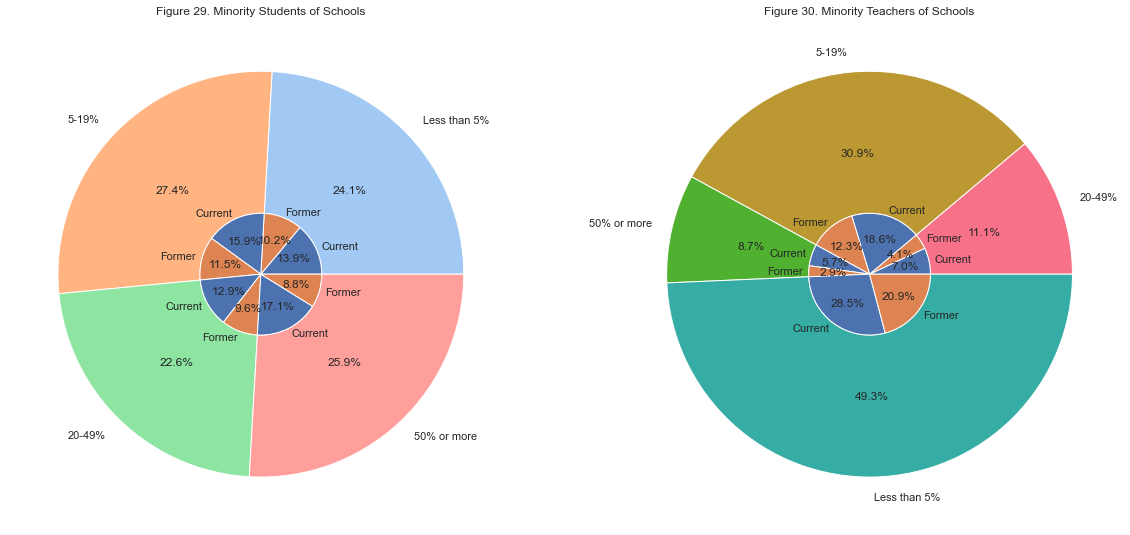

In [28]:
# sns.set(rc={'figure.figsize':(10,10)})
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('pastel')[:minenr.MINENR.nunique()]
axes[0].pie(minenr.total.unique().tolist(), labels=minenr.MINENR.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(minenr.CNTLNUM_T.tolist(), labels=minenr.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Minority Students of Schools')
fig_index+=1

colors=sns.color_palette('husl')[:mintch.mintch_txt.nunique()]
axes[1].pie(mintch.total.unique().tolist(), labels=mintch.mintch_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(mintch.CNTLNUM_T.tolist(), labels=mintch.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Minority Teachers of Schools')
fig_index+=1

plt.show()

For Figure 29 and 30, the minority students and teachers are consist of Hispanic(regardless of race), Black(non Hispanic), American Indian or Alaska Native(non Hispanic), and Asian or Pacific Islander. Generally, schools have diverse distribution of race and ethnicity among students than teachers as the half of teachers works at the schools with less than 5% of minority teachers. The schools with largest population of minority students and teachers have the smallest ratio of Former teachers.

### 🔥 (NEW!): Student-Teacher Ratio ###

In [29]:
stu_tch=df[['STU_TCH','TFS']].copy()
stu_tch.drop([stu_tch[stu_tch.STU_TCH==745.60].index][0], inplace=True)
stu_desc=pd.DataFrame({'Current': stu_tch[stu_tch.TFS=='Current'].describe()['STU_TCH'], 'Former': stu_tch[stu_tch.TFS=='Former'].describe()['STU_TCH']})

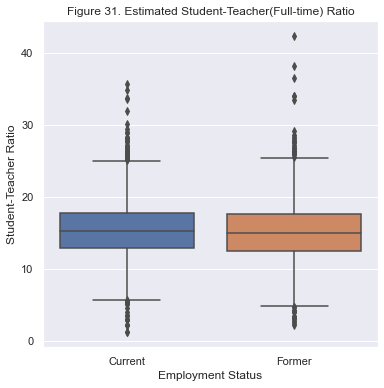

Current       Former
count  2175.000000  1464.000000
mean     15.425030    15.278265
std       4.056818     4.371663
min       1.150000     2.190000
25%      12.920000    12.520000
50%      15.210000    15.030000
75%      17.760000    17.662500
max      35.610000    42.350000

In [30]:
sns.set(rc={'figure.figsize':(6,6)})
fig=sns.boxplot(data=stu_tch, x='TFS', y='STU_TCH', order=['Current', 'Former'])
fig.set(xlabel='Employment Status', ylabel='Student-Teacher Ratio', title='Figure '+str(fig_index)+'. Estimated Student-Teacher(Full-time) Ratio')
fig_index+=1
plt.show()
stu_desc

Figure 31 indicates there is very little, almost none, difference in distributions of the student-teach ratio with respect to Current and Former teachers.

## Public School: Poverty Proxy ##
### Title 1 ###

In [31]:
title1=df.groupby(['S0288', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
title1['total']=title1.groupby('S0288').transform(lambda x: x.sum())['CNTLNUM_T']
title1['S0288']=title1['S0288'].apply(lambda x: 'Yes' if x==1 else 'No')

num_title1=df.S0288.value_counts()[1]
num_non_title1=df.S0288.value_counts()[2]
num_TAS=df.S0290.value_counts().sum()-df.S0290.value_counts()[-8]
num_SWP=num_title1-num_TAS

data1=[num_non_title1, num_TAS, num_SWP]
labels1=['Non Title 1', ' Targeted Assistance', 'Schoolwide']

In [32]:
def df_check_yes(x):
    total=[1 for i in range(len(x)) if x[i]==1]
    return 1 if (sum(total)==len(x)) else 2

def df_check_no(x):
    total=[x[i] for i in range(len(x))]
    return 1 if (sum(total)==len(x)*2) else 2

cols=np.array(['S0306', 'S0307', 'S0308'])
label=np.array(['Reading', 'Math', 'ESL'])
label_idx=[[0,1,2], [0,1], [0,2], [1,2], [0], [1], [2]]
labels2=[]

for i in label_idx:
    temp=np.array_str(label[i])
    temp=temp[2:-2].replace("' '","+")
    labels2.append(temp)    
    df[temp]=df[cols[i]].apply(lambda x: df_check_yes(x), axis=1)

labels2.append('Other_Services')
df['Other_Services']=df[cols].apply(lambda x: df_check_no(x), axis=1)

data2=[df[i].value_counts()[1] for i in labels2]

In [33]:
fig, axes=plt.subplots(1,3, figsize=(20,10))

colors=sns.color_palette('husl')[:title1.S0288.nunique()]
axes[0].pie(title1.total.unique().tolist(), labels=title1.S0288.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(title1.CNTLNUM_T.tolist(), labels=title1.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Title 1 Program Participation')
fig_index+=1

colors=sns.color_palette('pastel')[0:3]
axes[1].pie(data1, labels=labels1, colors=colors, autopct='%1.1f%%')
axes[1].set(title='Figure '+str(fig_index)+'. Title 1 Program Category')
fig_index+=1

colors=sns.color_palette('pastel')[0:8]
axes[2].pie(data2, labels=labels2, colors=colors, autopct='%1.1f%%')
axes[2].set(title='Figure '+str(fig_index)+'. Targeted Assistance Title 1 Services')
fig_index+=1

plt.show()

- Figure 32: Title 1 schools have higher ratio of Current teachers while more than half of schools do not paricipate Title 1 program at all.

- Figure 33: 31.7% of schools receive schoolwide Title 1 services, and 11.4% of them have Targeted Assistance Title 1 services. 

- Figure 34: The survey asked whether the Targeted Assistance are belong the 3 categories of the Title 1 services - Reading/Language Arts, Mathematics, and ESL. Among those 11.4% of schools, Reading and Math are the major services, and the schools receiving ESL service are 23.7%(4.9+6.9+4.9+7.0).

### 🔥 (NEW!): FRPL, NPL ###

In [34]:
FRPL=df.groupby(['S0282', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
FRPL['total']=FRPL.groupby('S0282').transform(lambda x: x.sum())['CNTLNUM_T']
FRPL['S0282']=FRPL['S0282'].apply(lambda x: 'Yes' if x==1 else 'No' if x==2 else 'Don\'t Know')

In [35]:
df['S0285_txt']=df['S0285'].apply(lambda x: 'Yes' if x==1 else 'No' if x==2 else 'No')
NLP=df.groupby(['S0285_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
NLP['total']=NLP.groupby('S0285_txt').transform(lambda x: x.sum())['CNTLNUM_T']

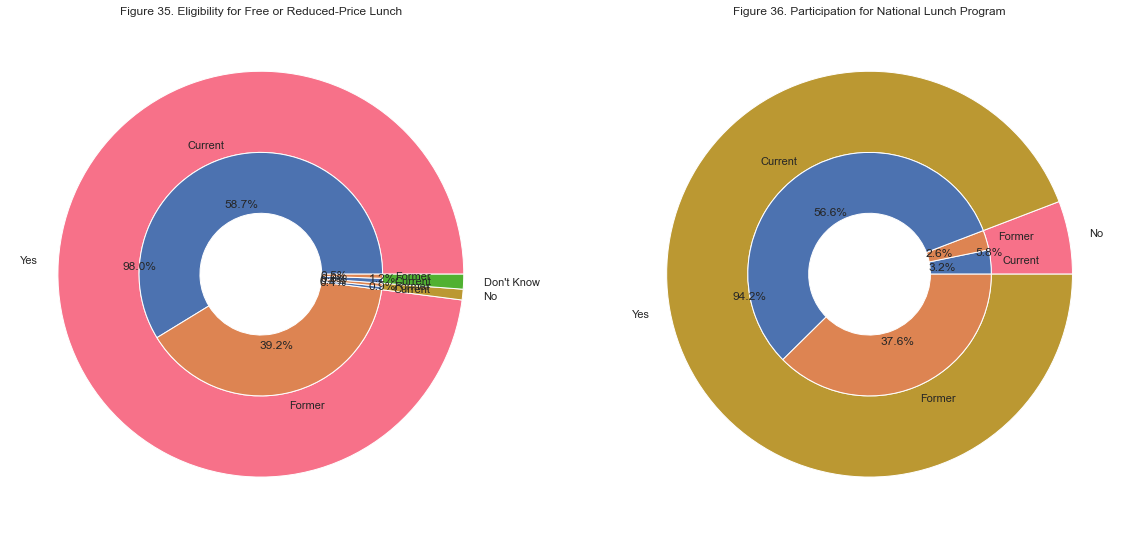

In [36]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.4

colors=sns.color_palette('husl')[:FRPL.S0282.nunique()]
axes[0].pie(FRPL.total.unique().tolist(), labels=FRPL.S0282.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(FRPL.CNTLNUM_T.tolist(), labels=FRPL.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Eligibility for Free or Reduced-Price Lunch')
fig_index+=1

colors=sns.color_palette('husl')[:NLP.S0285_txt.nunique()]
axes[1].pie(NLP.total.unique().tolist(), labels=NLP.S0285_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(NLP.CNTLNUM_T.tolist(), labels=NLP.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Participation for National Lunch Program')
fig_index+=1

plt.show()

- Figure 35: 98% of schools have at least 1 student eligible for free or reduced-priced lunches regardless of the National School Lunch program or other.

- Figure 36: 94% of schools participate the National School Lunch Program, and the retention rate is little higher on those 94% schools.

## Public Principal: Demographic information  ##
### gender, age, race/ethnicity ###

In [37]:
gender=df.groupby(['A0227', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
gender['total']=gender.groupby('A0227').transform(lambda x: x.sum())['CNTLNUM_T']
gender['A0227']=gender['A0227'].apply(lambda x: 'Male' if x==1 else 'Female')

category={1: '< 40', 2: '40-44', 3: '45-49', 4: '50-54', 5: '>= 55'}
age=df.groupby(['AGE_P', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
age['total']=age.groupby('AGE_P').transform(lambda x: x.sum())['CNTLNUM_T']
age['AGE_P']=age['AGE_P'].map(category)

category={1: 'American Indian', 2: 'Asian', 3: 'Black', 4: 'White', 5: 'Hispanic'}
df['raceth_p_txt']=df['RACETH_P'].map(category)

category={1: 'Non-White', 2: 'Non-White', 3: 'Non-White', 4: 'White', 5: 'Non-White'}
df['white_p_txt']=df['RACETH_T'].map(category)
white=df.groupby(['white_p_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
white['total']=white.groupby('white_p_txt').transform(lambda x: x.sum())['CNTLNUM_T']

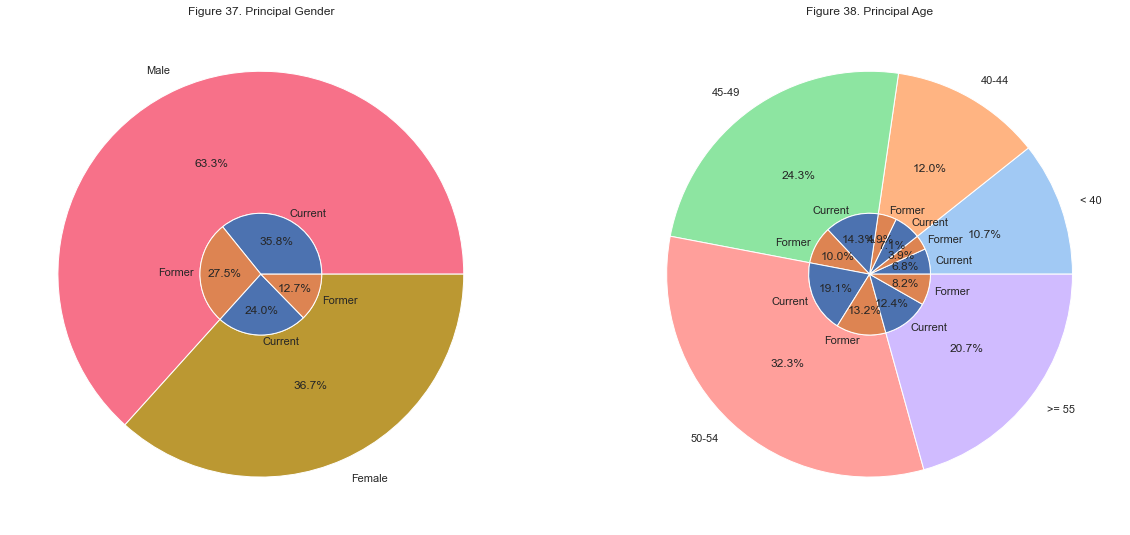

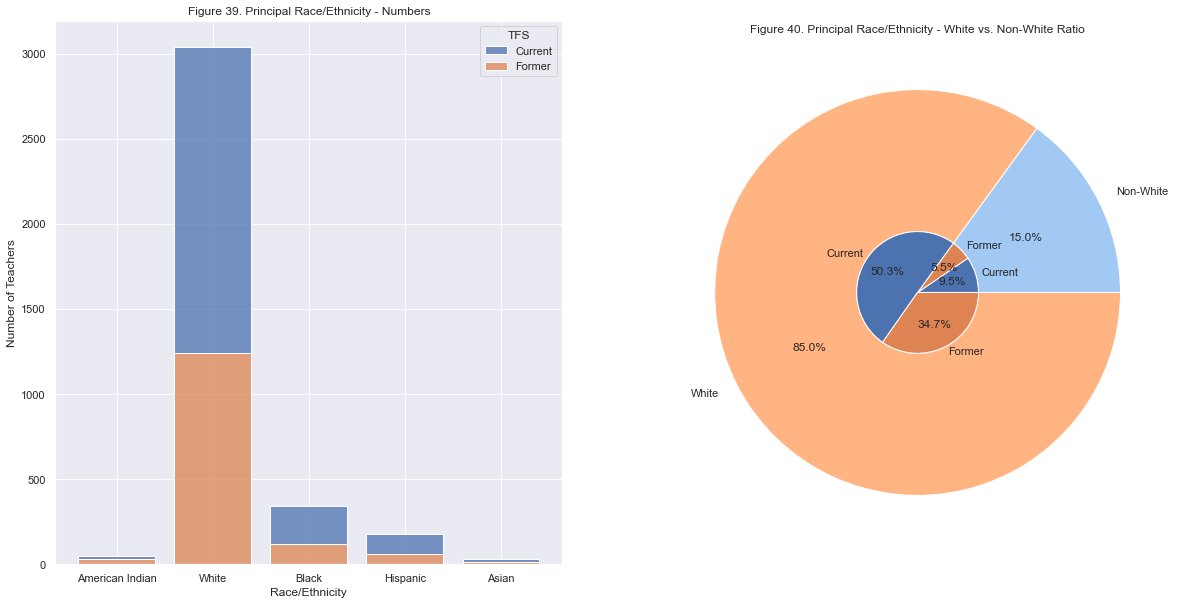

In [38]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:gender.A0227.nunique()]
axes[0].pie(gender.total.unique().tolist(), labels=gender.A0227.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(gender.CNTLNUM_T.tolist(), labels=gender.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Principal Gender')
fig_index+=1

colors=sns.color_palette('pastel')[:age.AGE_P.nunique()]
axes[1].pie(age.total.unique().tolist(), labels=age.AGE_P.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(age.CNTLNUM_T.tolist(), labels=age.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Principal Age')
fig_index+=1

fig, axes=plt.subplots(1,2, figsize=(20,10))
sns.histplot(ax=axes[0], data=df, x='raceth_p_txt', hue='TFS', multiple='stack', hue_order=['Current', 'Former'], shrink=0.8)#multiple='fill'
axes[0].set(xlabel='Race/Ethnicity', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Principal Race/Ethnicity - Numbers')
fig_index+=1

colors=sns.color_palette('pastel')[:white.white_p_txt.nunique()]
axes[1].pie(white.total.unique().tolist(), labels=white.white_p_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(white.CNTLNUM_T.tolist(), labels=white.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Principal Race/Ethnicity - White vs. Non-White Ratio')
fig_index+=1

plt.show()

- Figure 37: Female principals have smaller population than Male principals, however, their school teachers retention rate is higher.

- Figure 38: Teachers have their principal who is 45-54 years old the most, and their turnover is similar regardless of their principals age.

- Figure 39: The majority of teachers have White principal, and Black, Hispanic principals are following.

- Figure 40: While White principals comprise the administrative position, the retention rate is higher for Non-White principals.

### 🔥 (NEW!): degree, salary ###

In [39]:
category={1: 'Associate', 2: 'Bachelors', 3: 'Masters', 4: 'Education specialist or\nprofessional diploma', 5: 'Doctorate or\nfirst professional degree'}
degree_p=df.groupby(['A0225', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
degree_p['total']=degree_p.groupby('A0225').transform(lambda x: x.sum())['CNTLNUM_T']
degree_p['A0225']=degree_p['A0225'].map(category)

category={1: 'Less than $49,000', 2: '\$49,000-$59,999', 3: '\$60,000-$69,999', 4: '\$70,000-$79,999', 5: '\$80,000-$89,999', 6: '\$90,000 or more'}
salary=df.groupby(['A0226', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
salary['total']=salary.groupby('A0226').transform(lambda x: x.sum())['CNTLNUM_T']
salary['A0226']=salary['A0226'].map(category)

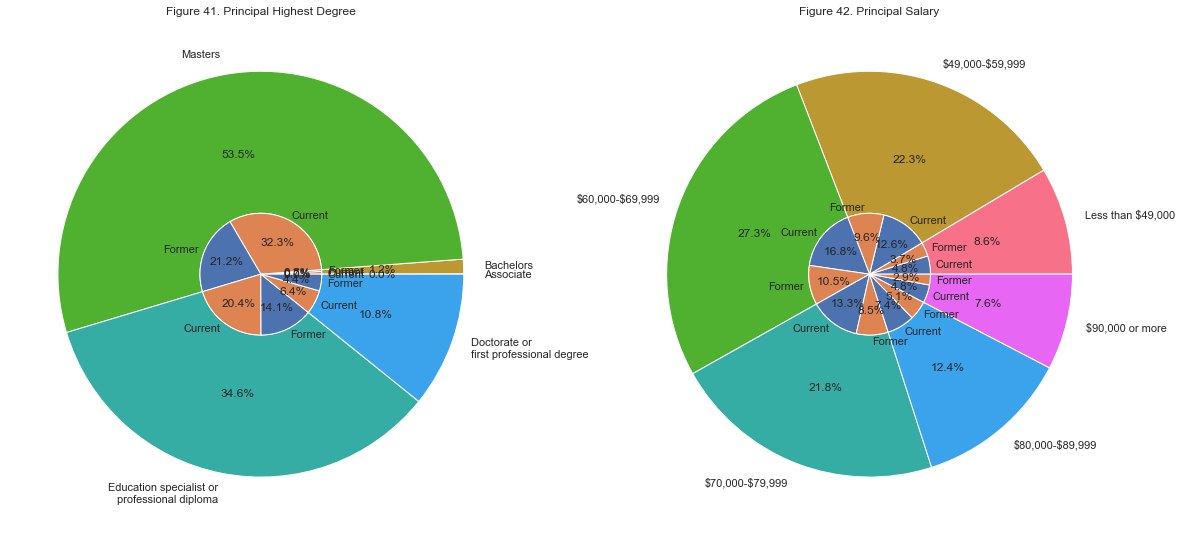

In [40]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:degree_p.A0225.nunique()]
axes[0].pie(degree_p.total.unique().tolist(), labels=degree_p.A0225.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(degree_p.CNTLNUM_T.tolist(), labels=degree_p.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Principal Highest Degree')
fig_index+=1

colors=sns.color_palette('husl')[:salary.A0226.nunique()]
axes[1].pie(salary.total.unique().tolist(), labels=salary.A0226.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(salary.CNTLNUM_T.tolist(), labels=salary.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Principal Salary')
fig_index+=1

plt.show()

- Figure 41: While almost all principals have more education than bachelor’s degree, the retention rate is stable for all categories of degrees.

- Figure 42: The majority of principals have their salary range between $49K to $60K, the ratio of Current teachers rises gradually as the salary range increases.

## Public Principal: Teaching and Training ##
### years of experience ###

In [41]:
yrs_p_this=df.groupby(['A0053', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
yrs_p_oth=df.groupby(['A0054', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

yrs_p_this['School_Employed']='This School'
yrs_p_oth['School_Employed']='Other Schools'
yrs_p_this.rename(columns={'A0053': 'years'}, inplace=True)
yrs_p_oth.rename(columns={'A0054': 'years'}, inplace=True)
yrs_p=pd.concat([yrs_p_this, yrs_p_oth], ignore_index=True)

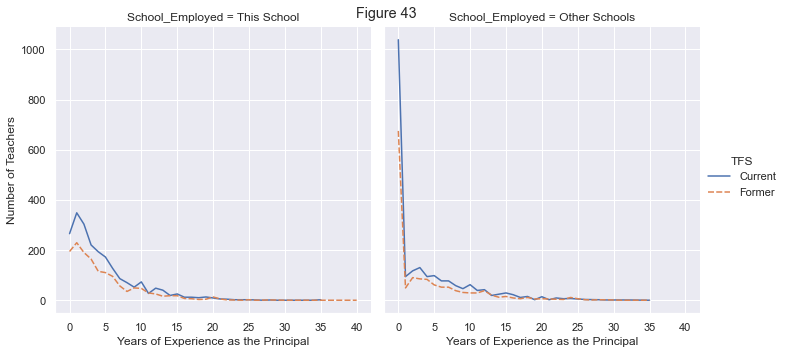

In [42]:
sns.set(rc={'figure.figsize':(20,10)})

fig=sns.relplot(data=yrs_p, x='years', y='CNTLNUM_T', col='School_Employed', hue='TFS', style='TFS', kind='line', hue_order=['Current', 'Former'])
fig.set(xlabel='Years of Experience as the Principal', ylabel='Number of Teachers')
fig.fig.suptitle('Figure '+str(fig_index))
fig_index+=1
plt.show()

Figure 43 indicates the number of teachers having a principal with the years of experience as the principal at This schools, on the left side, and at the Other schools on the right side. The fluctuation of the years shows the similar pattens for both Former and Current teachers at This and Other schools. However, the peak poluation of Former teachers appears when the principal's experience at This school is 1 year, and the same principal's experience at Other schools is 0 year. That means the teachers are likely leaving when they have new principal with no previous working experience as a principal.

In [43]:
yrs_tch_bf=df.groupby(['A0055', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
yrs_tch_af=df.groupby(['A0056', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

yrs_tch_bf['Teaching_Experience']='Before Principal'
yrs_tch_af['Teaching_Experience']='Since Principal'
yrs_tch_bf.rename(columns={'A0055': 'years'}, inplace=True)
yrs_tch_af.rename(columns={'A0056': 'years'}, inplace=True)
yrs_p_tch=pd.concat([yrs_tch_bf, yrs_tch_af], ignore_index=True)

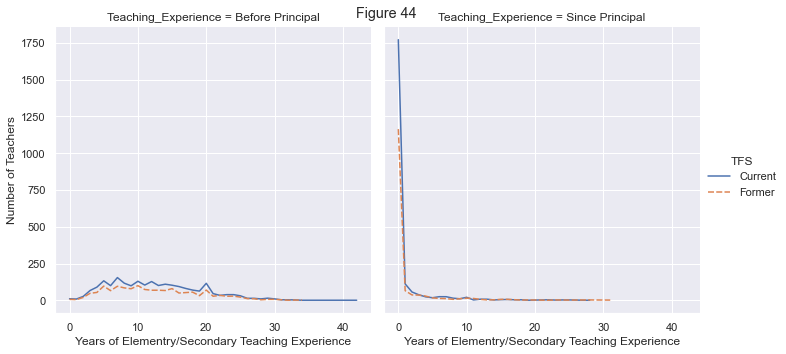

In [44]:
sns.set(rc={'figure.figsize':(20,10)})
fig=sns.relplot(data=yrs_p_tch, x='years', y='CNTLNUM_T', col='Teaching_Experience', hue='TFS', style='TFS', kind='line', hue_order=['Current', 'Former'])
fig.set(xlabel='Years of Elementry/Secondary Teaching Experience', ylabel='Number of Teachers')
fig.fig.suptitle('Figure '+str(fig_index))
fig_index+=1
plt.show()

The survey also aksed the principals whether they have teaching experience for elementry and secondary education before(left side of Figure 44) and since(right side of Figure 44) they became a principal. The figure also shows the similar fluctuation of Former and Current teachers popluation as the years of their principal's teaching experience increase. But, the population of Former teachers is peaked when their principal is not teaching at all since they became the principal.

## 🔥 NEW Public District (available from Public School): Incentive Policy ## 

In [45]:
cols=['S1611', 'S1612', 'S1613', 'S1614']
incen=df.groupby(['S1611', 'S1612', 'S1613', 'S1614', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

yes_out, yes_in, no_in, no_out = [], [], [], []

for c in cols:
    yes_out+=incen[incen[c]==1].groupby(c).transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()
    yes_in+=incen[incen[c]==1].groupby('TFS').transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()
    no_out+=incen[incen[c]==2].groupby(c).transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()
    no_in+=incen[incen[c]==2].groupby('TFS').transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()

labels_outer=['National Board Certification', 'Excellence in Teaching', 'Professional Development', 'Less Desirable Location']
labels_inner=['Current', 'Former', 'Current', 'Former', 'Current', 'Former', 'Current', 'Former']

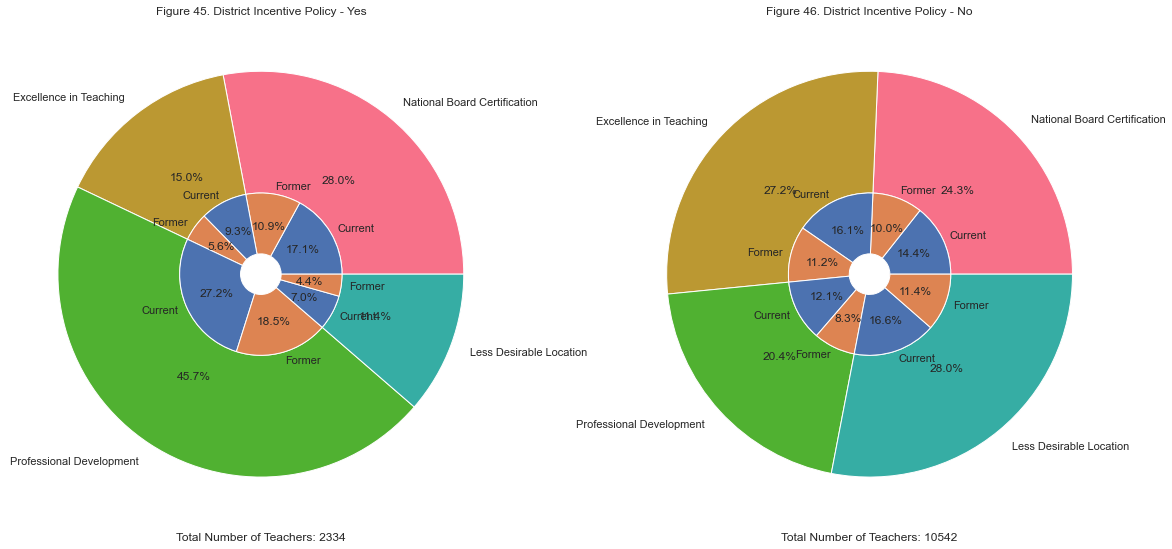

In [46]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:len(yes_out)]
axes[0].pie(yes_out, labels=labels_outer, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(yes_in, labels=labels_inner, colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. District Incentive Policy - Yes', xlabel='Total Number of Teachers: '+str(sum(yes_out)))
fig_index+=1

colors=sns.color_palette('husl')[:len(no_out)]
axes[1].pie(no_out, labels=labels_outer, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(no_in, labels=labels_inner, colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. District Incentive Policy - No', xlabel='Total Number of Teachers: '+str(sum(no_out)))
fig_index+=1

plt.show()

Figure 45 and 46 reflect the ratio of teachers regarding question asking whether a district has any pay incentive policy – cash bonuses, salary increases - for their performance or development. Figure 45 indicates the districts with the incentive policy, and Figure 46 shows the ratio of teachers working in the districts with no such policy. Overall, both charts have around 60% of Current teachers throughout all four categories reward items. 

In [47]:
category={1: 'Yes', 2: 'No', -9: 'N/A'}
reten=df.groupby(['S1615', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
reten['total']=reten.groupby('S1615').transform(lambda x: x.sum())['CNTLNUM_T']
reten.S1615=reten.S1615.map(category)

cols_non=['S1616', 'S1617', 'S1618', 'S1619', 'S1624', 'S1625', 'S1626', 'S1627']
cols_stem=[ 'S1620', 'S1621', 'S1622', 'S1623']

data=[]
data_stem=0

incen=df.groupby(cols_non+cols_stem, as_index=False).agg({'CNTLNUM_T': 'count'})

for c in cols_non:
    data.append(incen[incen[c]==1].CNTLNUM_T.sum())

for c in cols_stem:
    data_stem+=incen[incen[c]==1].CNTLNUM_T.sum()

data.append(data_stem)
labels=['General Elementary', 'Special Education', 'English', 'Social Studies', 'ESL', 'Foreign Languages', 'Music/Art', 'Vocational/Technical', 'STEM']

In [48]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:reten.S1615.nunique()]
axes[0].pie(reten.total.unique().tolist(), labels=reten.S1615.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(reten.CNTLNUM_T.tolist(), labels=reten.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. District Retention Incentive Policy')
fig_index+=1

colors=sns.color_palette('husl')[:len(data)]
axes[1].pie(data, labels=labels, colors=colors, autopct='%1.1f%%')#, wedgeprops=dict(width=size, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. District Retention Incentive Policy')
fig_index+=1

- Figure 47: While 17% of teachers working in the district having pay incentives to recruit or retain teachers in the field of shortage, those districts with the retention incentive policy have higher retention rate.

- Figure 48: Those districts providing the retention incentive policy have 12 different fields offering the incentives. STEM is the dominant field in the policy, and Special Education and ESL are following. STEM fields include Computer science, Mathematics, Physical sciences, and Biological/Life sciences.

# Correlation #

Correlation between any two features is visualized with five heatmaps below, and the features contained in each heatmap have the similar fashion as in the EDA above. The correlation achieves two purposes for building machine learning models further:

First, we can examine how the label, Current Teacher, and a feature is linearly related at a glance. This helps determining features to be included in ML models - feature selection. 

Second, we can discover collinearity between any two features by exploring the heatmaps so that we could possibly compare or remove duplicated features. 

The features are processed as below for the correlation and heatmap:
- The names of features are updated following Dr. Feng’s naming convention. 
- All binomial features are *get_dummies()* and left with the response value corresponding to the feature name. e.g.) gender_T_Female=1 means Teacher’s gender is female.
- Nominal features are *get_dummies()* and processed as these two types:
  - treated as one vs. all. e.g.) BA_major_code_STEM=1 means Teacher’s BA major is STEM; BA_major_code_STEM=0 means it is one of other majors.
  - treated as a binomial. e.g.) region_West means School is located in West.
-All numerical and ordinal features, including Likert scale categories,  are not *get_dummies()*. 

**Heatmap List**
1. Public Teacher #1: General, Demographic information 
1. Public Teacher #2: Education and Training 
1. Public Teacher #3: Teaching Experience
1. Public School: General information, Poverty Proxy
1. Public Principal and Public District (available from Public School)
  - Principals Demographic information, Teaching and Training 
  - District Incentive Policy

In [49]:
df=pd.read_csv('../data/data_clean/SASS_99_00_T2_T3_S4A_S3A_S2A.csv', sep=',', header=0)
df.shape

(3640, 135)

### Public Teacher #1 ###
- Features: `region`, `marital_status`, `race_teacher`, `gender_t`, `summer_teaching`, `nonteaching_job`, `nonschool_job`, `extracur_act`, `merit_pay`, `outside_pay`, `union_member`, `age_t`, `total_yearly_earnings`, `school_related_earnings`, `base_salary_amt`, `number_of_dependents`, `dependents_under_age_5`

In [50]:
cols=['label', 'REGION', 'F0195', 'RACETH_T', 'GENDER', 'T0341', 'T0343', 'T0345', 'T0348', 'T0350', 'T0352', 'T0355', 'AGE_T', 'EARNALL', 'EARNSCH', 'T0347', 'F0196', 'F0197']
cols_new=['label_Current_Teacher', 'region', 'marital_status', 'race_teacher', 'gender_t', 'summer_teaching', 'nonteaching_job', 'nonschool_job', 'extracur_act', 'merit_pay', 'outside_pay', 'union_member', 'age_t', 'total_yearly_earnings', 'school_related_earnings', 'base_salary_amt', 'number_of_dependents', 'dependents_under_age_5']
cols_dummies=['region', 'marital_status', 'race_teacher', 'gender_t', 'summer_teaching', 'nonteaching_job', 'nonschool_job', 'extracur_act', 'merit_pay', 'outside_pay', 'union_member']
cols_drop=['marital_status_2', 'marital_status_3', 'race_teacher_1', 'race_teacher_2', 'race_teacher_3', 'race_teacher_5', 'gender_t_1', 'summer_teaching_2', 'nonteaching_job_2', 'nonschool_job_2', 'extracur_act_2', 'merit_pay_2', 'outside_pay_2', 'union_member_2']
names={'marital_status_1': 'marital_status_Married', 'race_teacher_4': 'race_teacher_White', 'gender_t_2': 'gender_t_Female', 'summer_teaching_1': 'summer_teaching_Yes', 'nonteaching_job_1': 'nonteaching_job_Yes', 'nonschool_job_1': 'nonschool_job_Yes', 'extracur_act_1': 'extracur_act_Yes', 'merit_pay_1': 'merit_pay_Yes', 'outside_pay_1': 'outside_pay_Yes', 'union_member_1': 'union_member_Yes'}

In [51]:
ren=dict(zip(cols, cols_new))
df_r=df[cols].copy()
df_r.rename(columns=ren, inplace=True)

In [52]:
keys=np.sort(df_r.region.unique())
values=['Northeast', 'Midwest', 'South', 'West']
ren=dict(zip(keys, values))
df_r.region=df_r.region.map(ren)

In [53]:
df_r=pd.get_dummies(df_r, columns=cols_dummies, prefix=cols_dummies)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

df_r.drop(cols_drop, axis=1, inplace=True)
# df_r.columns

df_r.rename(columns=names, inplace=True)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

[]
[]


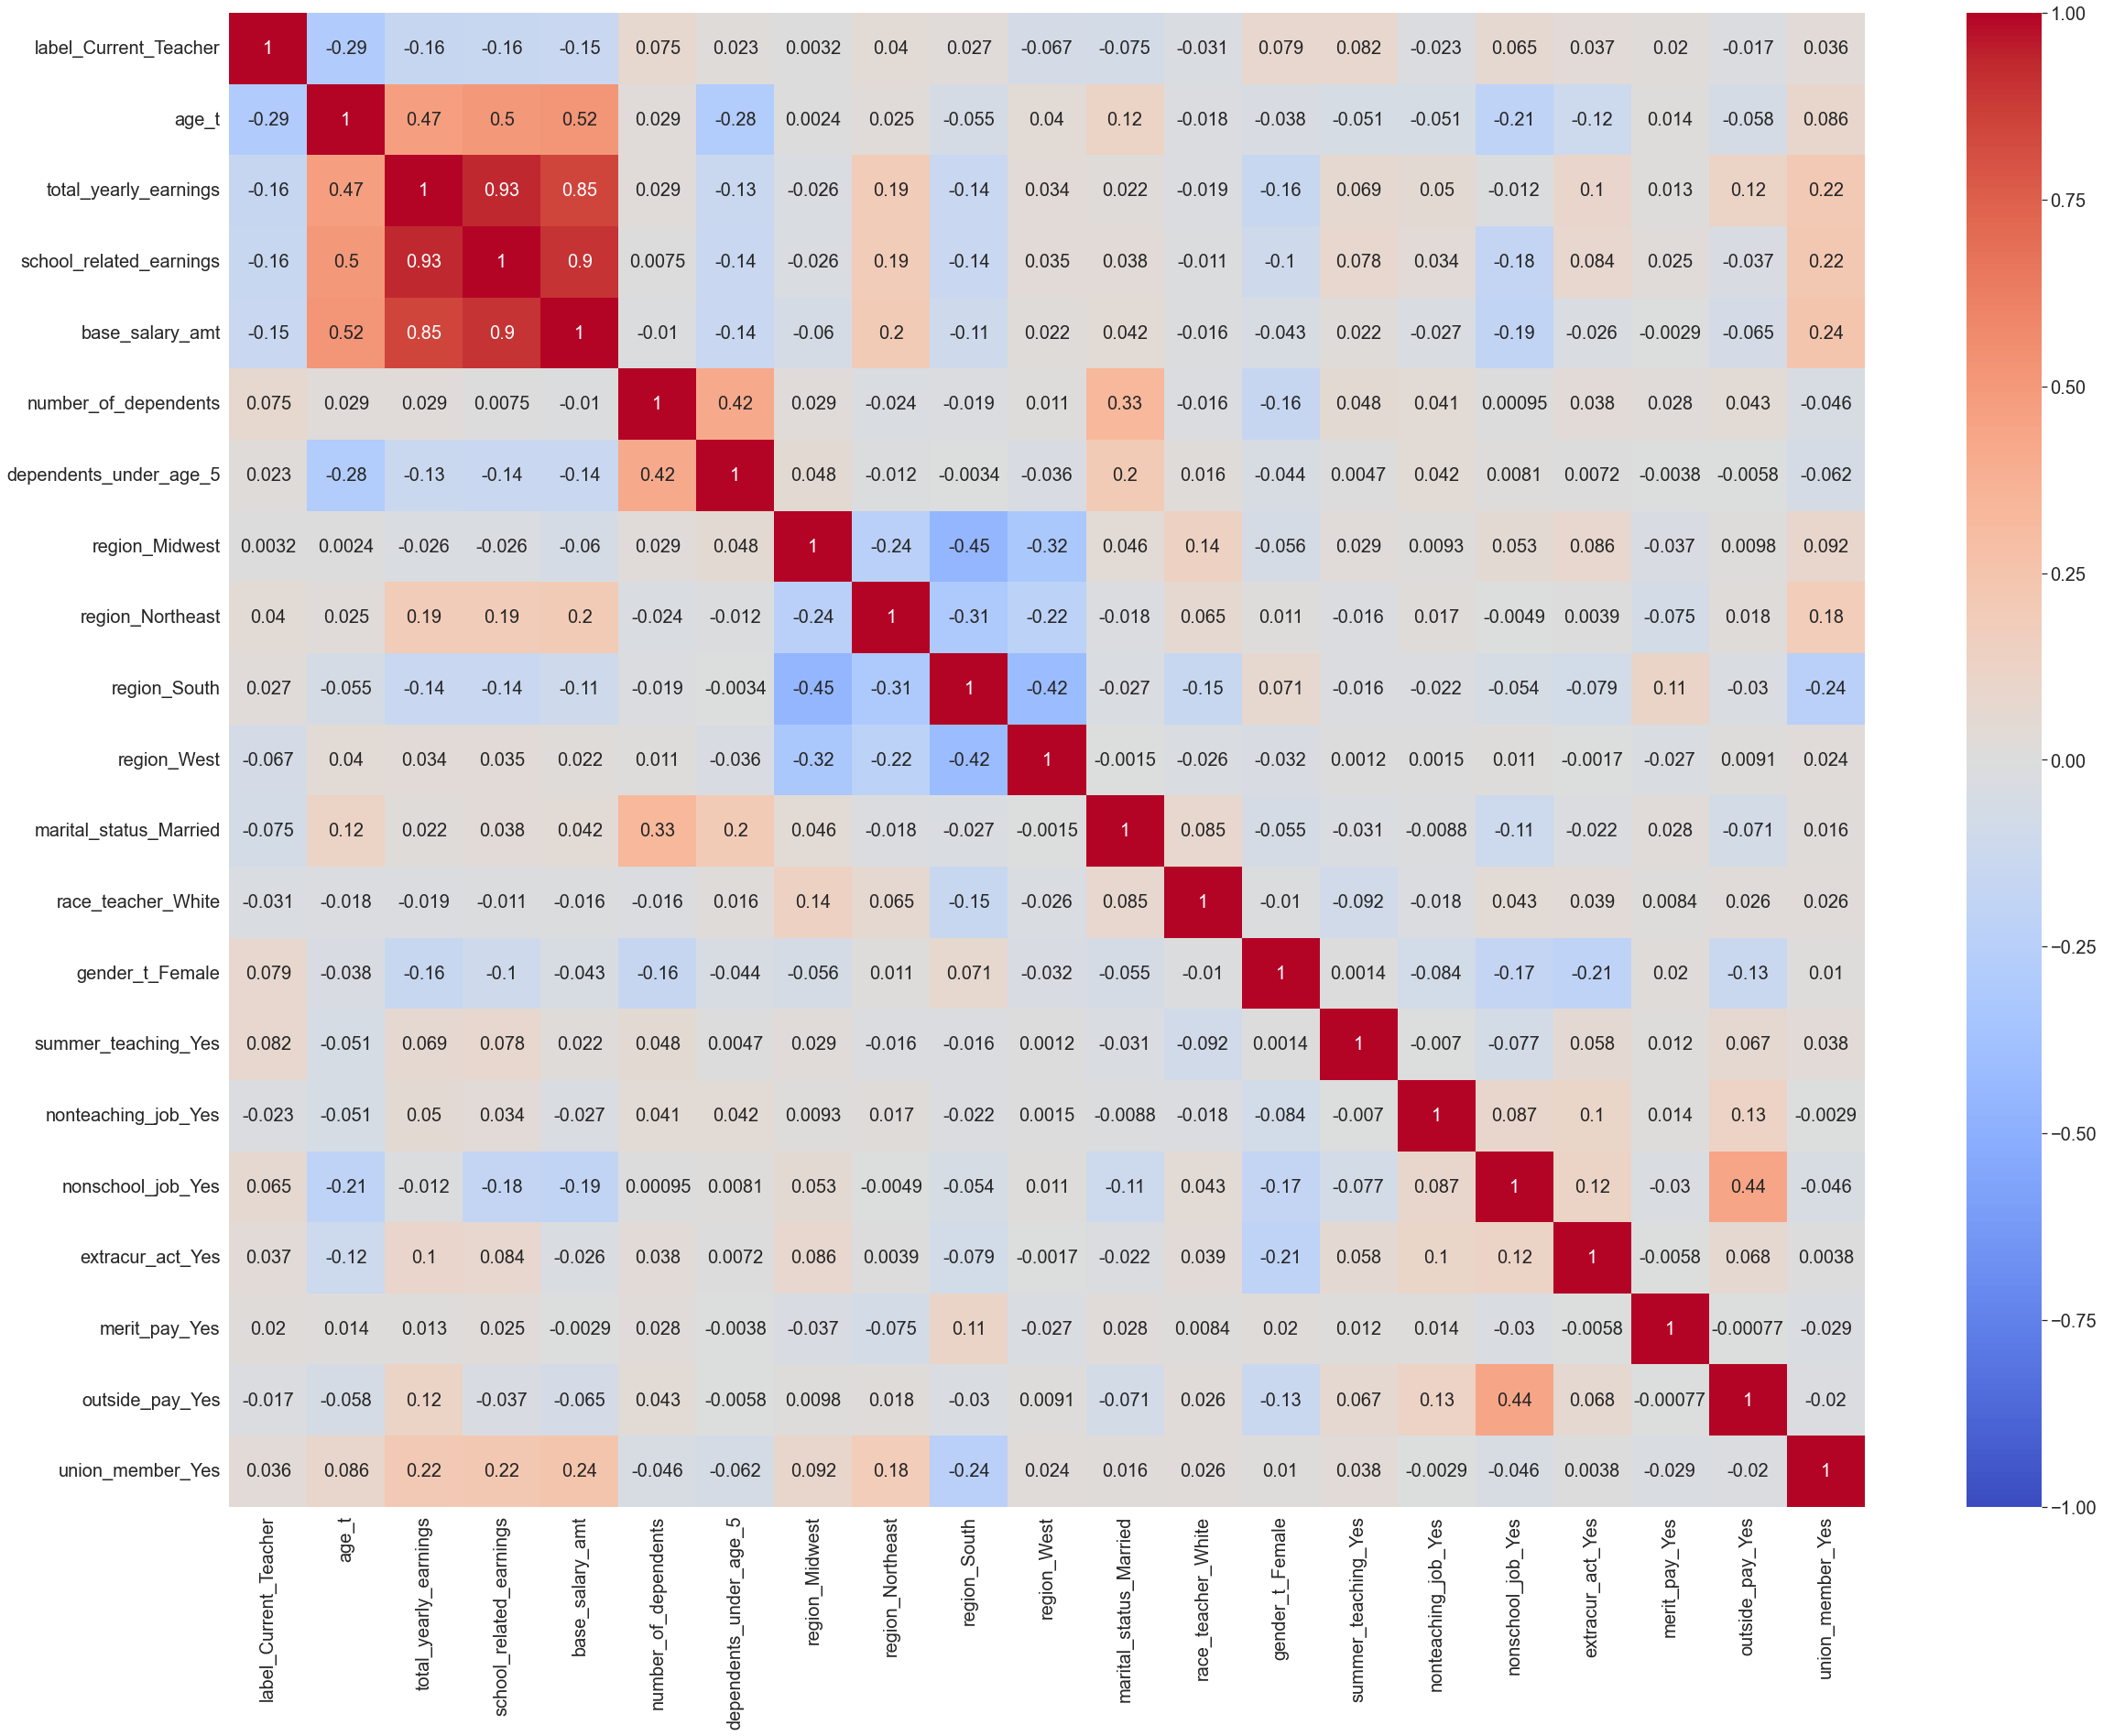

In [54]:
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

df_t1=df_r.corr()
plt.figure(figsize=(40,30))
sns.heatmap(data=df_t1, annot=True, annot_kws={"size":20}, cmap='coolwarm', vmin=-1)
plt.show()

In [55]:
pd.DataFrame(df_t1['label_Current_Teacher'].nlargest(6).sort_values(ascending=False))

label_Current_Teacher
label_Current_Teacher               1.000000
summer_teaching_Yes                 0.082424
gender_t_Female                     0.078965
number_of_dependents                0.075240
nonschool_job_Yes                   0.065199
region_Northeast                    0.040315

In [56]:
pd.DataFrame(df_t1['label_Current_Teacher'].nsmallest(5))

label_Current_Teacher
age_t                                -0.294343
total_yearly_earnings                -0.162032
school_related_earnings              -0.155463
base_salary_amt                      -0.146667
marital_status_Married               -0.074866

Public Teachers general and demographic information do not show strong correlations between the features and Current teacher status. `age` and Current teacher indicates slight negative correlation in which teachers age increases, Current teachers decreases.

### Public Teacher #2 ###
- Features: `main_tch_fields_cert_type`, `MA_deg`, `BA_major_code`, `MA_major_code`, `main_field_cert`, `BA_deg`, `AA_deg`, `BA2_deg`, `MA2_deg`, `EdS_deg`, `Grad_cert`, `Phd_deg`, `pd_release_t`, `pd_schedule_t`, `pd_stipend`, `pd_tuition_r`, `pd_conference_r`, `pd_travel_r`, `MA_grad_yr`

In [57]:
cols=['label', 'T0104', 'T0080', 'T0072', 'T0081', 'T0103', 'T0070', 'T0084', 'T0087', 'T0090', 'T0093', 'T0096', 'T0099', 'T0179', 'T0180', 'T0181', 'T0182', 'T0183', 'T0184', 'T0082']
cols_new=['label_Current_Teacher', 'main_tch_fields_cert_type', 'MA_deg', 'BA_major_code', 'MA_major_code', 'main_field_cert', 'BA_deg', 'AA_deg', 'BA2_deg', 'MA2_deg', 'EdS_deg', 'Grad_cert', 'Phd_deg', 'pd_release_t', 'pd_schedule_t', 'pd_stipend', 'pd_tuition_r', 'pd_conference_r', 'pd_travel_r', 'MA_grad_yr']
cols_dummies=['main_tch_fields_cert_type', 'MA_deg', 'main_field_cert', 'BA_deg', 'AA_deg', 'BA2_deg', 'MA2_deg', 'EdS_deg', 'Grad_cert', 'Phd_deg', 'pd_release_t', 'pd_schedule_t', 'pd_stipend', 'pd_tuition_r', 'pd_conference_r', 'pd_travel_r']
cols_drop=['main_tch_fields_cert_type_2', 'main_tch_fields_cert_type_3', 'main_tch_fields_cert_type_4', 'main_tch_fields_cert_type_5', 'main_tch_fields_cert_type_-8', 'MA_deg_2', 'MA_deg_-8', 'main_field_cert_2', 'BA_deg_2', 'AA_deg_-8', 'BA2_deg_-8', 'MA2_deg_-8', 'EdS_deg_-8', 'Grad_cert_-8', 'Phd_deg_-8', 'pd_release_t_2', 'pd_schedule_t_2', 'pd_stipend_2', 'pd_tuition_r_2', 'pd_conference_r_2', 'pd_travel_r_2']
names={'main_tch_fields_cert_type_1': 'main_tch_fields_cert_type_Regular', 'MA_deg_1': 'MA_deg_Yes', 'BA_major_code': 'BA_major_code_STEM', 'MA_major_code': 'MA_major_code_STEM', 'main_field_cert_1': 'main_field_cert_Yes', 'BA_deg_1': 'BA_deg_Yes', 'AA_deg_1': 'AA_deg_Yes', 'BA2_deg_1': 'BA2_deg_Yes', 'MA2_deg_1': 'MA2_deg_Yes', 'EdS_deg_1': 'EdS_deg_Yes', 'Grad_cert_1': 'Grad_cert_Yes', 'Phd_deg_1': 'Phd_deg_Yes', 'pd_release_t_1': 'pd_release_t_Yes', 'pd_schedule_t_1': 'pd_schedule_t_Yes', 'pd_stipend_1': 'pd_stipend_Yes', 'pd_tuition_r_1': 'pd_tuition_r_Yes', 'pd_conference_r_1': 'pd_conference_r_Yes', 'pd_travel_r_1': 'pd_travel_r_Yes'}

In [58]:
ren=dict(zip(cols, cols_new))

df_r=df[cols].copy()
df_r.rename(columns=ren, inplace=True)
df_r=pd.get_dummies(df_r, columns=cols_dummies, prefix=cols_dummies)

print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

df_r.drop(cols_drop, axis=1, inplace=True)
# df_r.columns

[]


In [59]:
df_r['BA_major_code']=df_r['BA_major_code'].apply(lambda x: 1 if x in range(57,64) else 0)
df_r['MA_major_code']=df_r['MA_major_code'].apply(lambda x: 1 if x in range(57,64) else 0)
# print(df_r['BA_major_code'].value_counts())
# print(df_r['MA_major_code'].value_counts())

In [60]:
df_r.rename(columns=names, inplace=True)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

[]


In [61]:
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

df_t2=df_r.corr()
plt.figure(figsize=(40,30))
sns.heatmap(data=df_t2, annot=True, annot_kws={"size":20}, cmap='coolwarm', vmin=-1)
plt.show()

In [62]:
pd.DataFrame(df_t2['label_Current_Teacher'].nlargest(6).sort_values(ascending=False))

label_Current_Teacher
label_Current_Teacher               1.000000
pd_stipend_Yes                      0.062885
pd_release_t_Yes                    0.056877
pd_conference_r_Yes                 0.045354
BA_deg_Yes                          0.045348
pd_tuition_r_Yes                    0.023195

In [63]:
pd.DataFrame(df_t2['label_Current_Teacher'].nsmallest(5))

label_Current_Teacher
MA_deg_Yes                                     -0.133055
MA_grad_yr                                     -0.107529
main_tch_fields_cert_type_Regular              -0.093737
BA_major_code_STEM                             -0.075040
MA2_deg_Yes                                    -0.050238

Public Teachers education and training data do not show strong, neither positive or negative,  correlations between the features and Current teacher status. 

### Public Teachers #3 ###
- Features: `class_org`, `would_be_tch`, `remin_in_teaching`, `main_teaching_fields`, `main_teaching_lastyr`, `ft_pt_status`, `teaches_ungraded`, `teaches_pk`, `teaches_k`, `teaches_1st`, `teaches_2nd`, `teaches_3rd`, `teaches_4th`, `teaches_5th`, `teaches_6th`, `teaches_7th`, `teaches_8th`, `teaches_9th`, `teaches_10th`, `teaches_11th`, `teaches_12th`, `new_teacher`, `ever_taught_private_school`, `ELA_hours_taught`, `math_hours_taught`, `social_studies_taught`, `science_hours_taught`, `hours_required_school`, `total_teaching_exp`, `public_ft_exp`, `public_pt_exp`, `private_ft_exp`, `private_pt_exp`

In [64]:
cols=['label', 'T0206', 'T0339', 'T0340', 'T0102', 'T0120', 'FTPT_S', 'T0191', 'T0192', 'T0193', 'T0194', 'T0195', 'T0196', 'T0197', 'T0198', 'T0199', 'T0200', 'T0201', 'T0202', 'T0203', 'T0204', 'T0205', 'NEWTCH', 'T0067', 'T0209', 'T0210', 'T0211', 'T0212', 'T0273', 'TOTEXPER', 'T0065', 'T0066', 'T0068', 'T0069']
cols_new=['label_Current_Teacher', 'class_org', 'would_be_tch', 'remin_in_teaching', 'main_teaching_fields', 'main_teaching_lastyr', 'ft_pt_status', 'teaches_ungraded', 'teaches_pk', 'teaches_k', 'teaches_1st', 'teaches_2nd', 'teaches_3rd', 'teaches_4th', 'teaches_5th', 'teaches_6th', 'teaches_7th', 'teaches_8th', 'teaches_9th', 'teaches_10th', 'teaches_11th', 'teaches_12th', 'new_teacher', 'ever_taught_private_school', 'ELA_hours_taught', 'math_hours_taught', 'social_studies_taught', 'science_hours_taught', 'hours_required_school', 'total_teaching_exp', 'public_ft_exp', 'public_pt_exp', 'private_ft_exp', 'private_pt_exp']
cols_dummies=['class_org', 'main_teaching_lastyr', 'ft_pt_status', 'teaches_ungraded', 'teaches_pk', 'teaches_k', 'teaches_1st', 'teaches_2nd', 'teaches_3rd', 'teaches_4th', 'teaches_5th', 'teaches_6th', 'teaches_7th', 'teaches_8th', 'teaches_9th', 'teaches_10th', 'teaches_11th', 'teaches_12th', 'new_teacher', 'ever_taught_private_school']
cols_drop=['main_teaching_lastyr_2', 'main_teaching_lastyr_3', 'ft_pt_status_2', 'teaches_ungraded_-8', 'teaches_pk_-8', 'teaches_k_-8', 'teaches_1st_-8', 'teaches_2nd_-8', 'teaches_3rd_-8', 'teaches_4th_-8', 'teaches_5th_-8', 'teaches_6th_-8', 'teaches_7th_-8', 'teaches_8th_-8', 'teaches_9th_-8', 'teaches_10th_-8', 'teaches_11th_-8', 'teaches_12th_-8', 'new_teacher_2', 'ever_taught_private_school_2']
names={'main_teaching_lastyr_1': 'main_teaching_lastyr_Same_as_thisyr', 'ft_pt_status_1': 'ft_pt_status_Full-time', 'teaches_ungraded_1': 'teaches_ungraded_Yes', 'teaches_pk_1': 'teaches_pk_Yes', 'teaches_k_1': 'teaches_k_Yes', 'teaches_1st_1': 'teaches_1st_Yes', 'teaches_2nd_1': 'teaches_2nd_Yes', 'teaches_3rd_1': 'teaches_3rd_Yes', 'teaches_4th_1': 'teaches_4th_Yes', 'teaches_5th_1': 'teaches_5th_Yes', 'teaches_6th_1': 'teaches_6th_Yes', 'teaches_7th_1': 'teaches_7th_Yes', 'teaches_8th_1': 'teaches_8th_Yes', 'teaches_9th_1': 'teaches_9th_Yes', 'teaches_10th_1': 'teaches_10th_Yes', 'teaches_11th_1': 'teaches_11th_Yes', 'teaches_12th_1': 'teaches_12th_Yes', 'new_teacher_1': 'new_teacher_Yes', 'ever_taught_private_school_1': 'ever_taught_private_school_Yes'}

In [65]:
ren=dict(zip(cols, cols_new))
df_r=df[cols].copy()
df_r.rename(columns=ren, inplace=True)

In [66]:
keys=np.sort(df_r.class_org.unique())
values=['Departmentalized', 'Elementary', 'Self_Contained', 'Team_Teaching', 'Pull_Out']
ren=dict(zip(keys, values))
df_r.class_org=df_r.class_org.map(ren)

In [67]:
df_r=pd.get_dummies(df_r, columns=cols_dummies, prefix=cols_dummies)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

df_r.drop(cols_drop, axis=1, inplace=True)
# df_r.columns

df_r.rename(columns=names, inplace=True)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

[]
[]


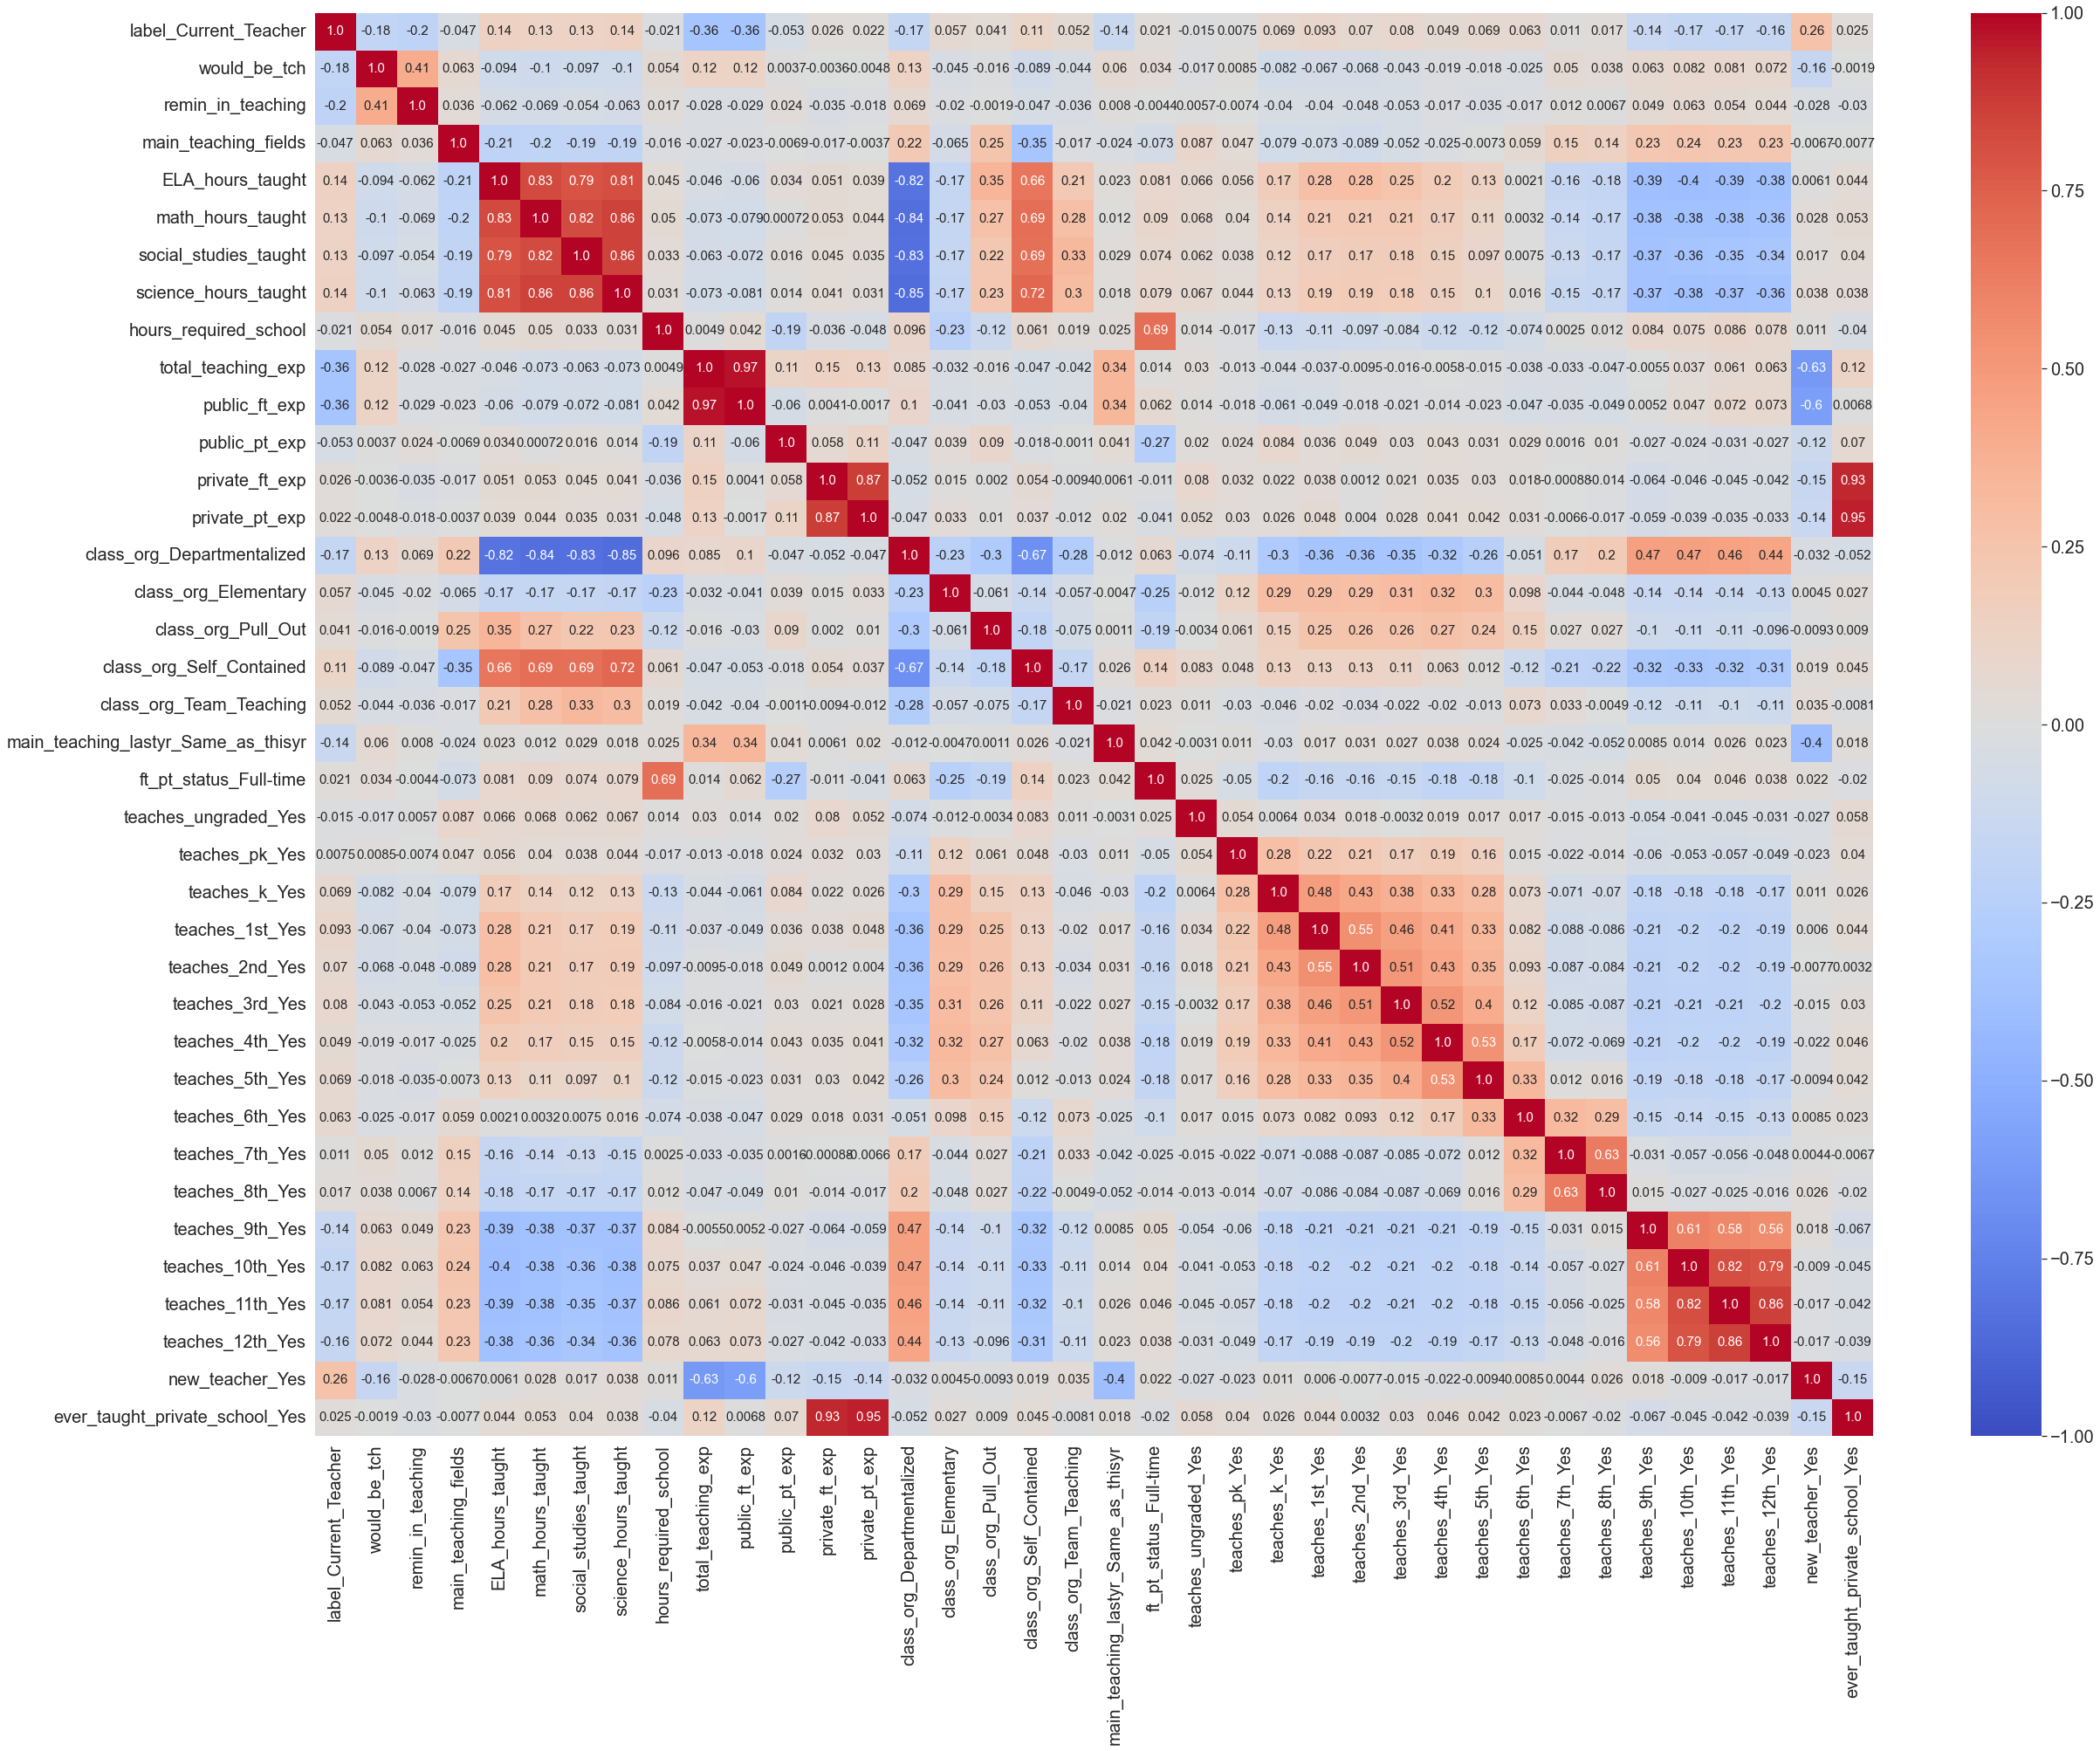

In [68]:
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

df_t3=df_r.corr()
plt.figure(figsize=(40,30))
sns.heatmap(data=df_t3, annot=True, annot_kws={"size":15}, fmt=".2", cmap='coolwarm', vmin=-1)
plt.show()

In [69]:
pd.DataFrame(df_t3['label_Current_Teacher'].nlargest(6).sort_values(ascending=False))

label_Current_Teacher
label_Current_Teacher               1.000000
new_teacher_Yes                     0.258777
ELA_hours_taught                    0.138732
science_hours_taught                0.135584
math_hours_taught                   0.132216
social_studies_taught               0.126285

In [70]:
pd.DataFrame(df_t3['label_Current_Teacher'].nsmallest(5))

label_Current_Teacher
public_ft_exp                   -0.357457
total_teaching_exp              -0.357093
remin_in_teaching               -0.203764
would_be_tch                    -0.181978
teaches_11th_Yes                -0.171054

Public Teachers teaching experience demonstrates some correlations overall among other features of Public Teachers. 

`new_teacher`, the teachers working 3 years or less, has slight positive correlation with Current teacher status.
Both `public_ft_exp` and `total_teaching_exp` have slight negative correlation with Current teacher status in which as those teachers remain working as a teacher for longer years in (public) school, they tend to become Former teacher.


### Public School ###
- Features: `type`, `level`, `urbanicity`, `FRPL_eligible`, `FRPL_NLP_participate`, `title_I_reading`, `title_I_math`, `title_I_esl`, `title_I_receive_students`, `percent_minority_students`, `percent_minority_teachers`, `FRPL_eligible_pk_students`, `FRPL_eligible_k_12_students`, `FRPL_approved_pk_students`, `FRPL_approved_k_12_students`, `title_I_receive_students_number`, `student_teacher_ratio`

In [71]:
cols=['label', 'PGMTYPE', 'SCHLEVEL', 'URBANIC', 'S0282', 'S0285', 'S0306', 'S0307', 'S0308', 'S0288', 'MINENR', 'MINTCH', 'S0283', 'S0284', 'S0286', 'S0287', 'S0290', 'STU_TCH']
cols_new=['label_Current_Teacher', 'type', 'level', 'urbanicity', 'FRPL_eligible', 'FRPL_NLP_participate', 'title_I_reading', 'title_I_math', 'title_I_esl', 'title_I_receive_students', 'percent_minority_students', 'percent_minority_teachers', 'FRPL_eligible_pk_students', 'FRPL_eligible_k_12_students', 'FRPL_approved_pk_students', 'FRPL_approved_k_12_students', 'title_I_receive_students_number', 'student_teacher_ratio']
cols_dummies=['type', 'level', 'urbanicity', 'FRPL_eligible', 'FRPL_NLP_participate', 'title_I_reading', 'title_I_math', 'title_I_esl', 'title_I_receive_students']
cols_drop=['FRPL_eligible_2', 'FRPL_eligible_3', 'FRPL_NLP_participate_2', 'FRPL_NLP_participate_-8', 'title_I_reading_2', 'title_I_reading_-8', 'title_I_math_2', 'title_I_math_-8', 'title_I_esl_2', 'title_I_esl_-8', 'title_I_receive_students_2']
names={'FRPL_eligible_1': 'FRPL_eligible_Yes', 'FRPL_NLP_participate_1': 'FRPL_NLP_participate_Yes', 'title_I_reading_1': 'title_I_reading_Yes', 'title_I_math_1': 'title_I_math_Yes', 'title_I_esl_1': 'title_I_esl_Yes', 'title_I_receive_students_1': 'title_I_receive_students_Yes'}

In [72]:
ren=dict(zip(cols, cols_new))
df_r=df[cols].copy()
df_r.rename(columns=ren, inplace=True)

In [73]:
keys=np.sort(df_r.type.unique())
values=['Regular', 'Elementary', 'Special', 'Voc_Tech', 'Alternative']
ren=dict(zip(keys, values))
df_r.type=df_r.type.map(ren)

keys=np.sort(df_r.level.unique())
values=['Elementary', 'Secondary', 'Combined']
ren=dict(zip(keys, values))
df_r.level=df_r.level.map(ren)

keys=np.sort(df_r.urbanicity.unique())
values=['Large_Mid_Central_City', 'Urban_Fringe_of_Large_Mid_City', 'Small_town_Rural']
ren=dict(zip(keys, values))
df_r.urbanicity=df_r.urbanicity.map(ren)

In [74]:
df_r=pd.get_dummies(df_r, columns=cols_dummies, prefix=cols_dummies)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

df_r.drop(cols_drop, axis=1, inplace=True)
# df_r.columns

df_r.rename(columns=names, inplace=True)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

[]
[]


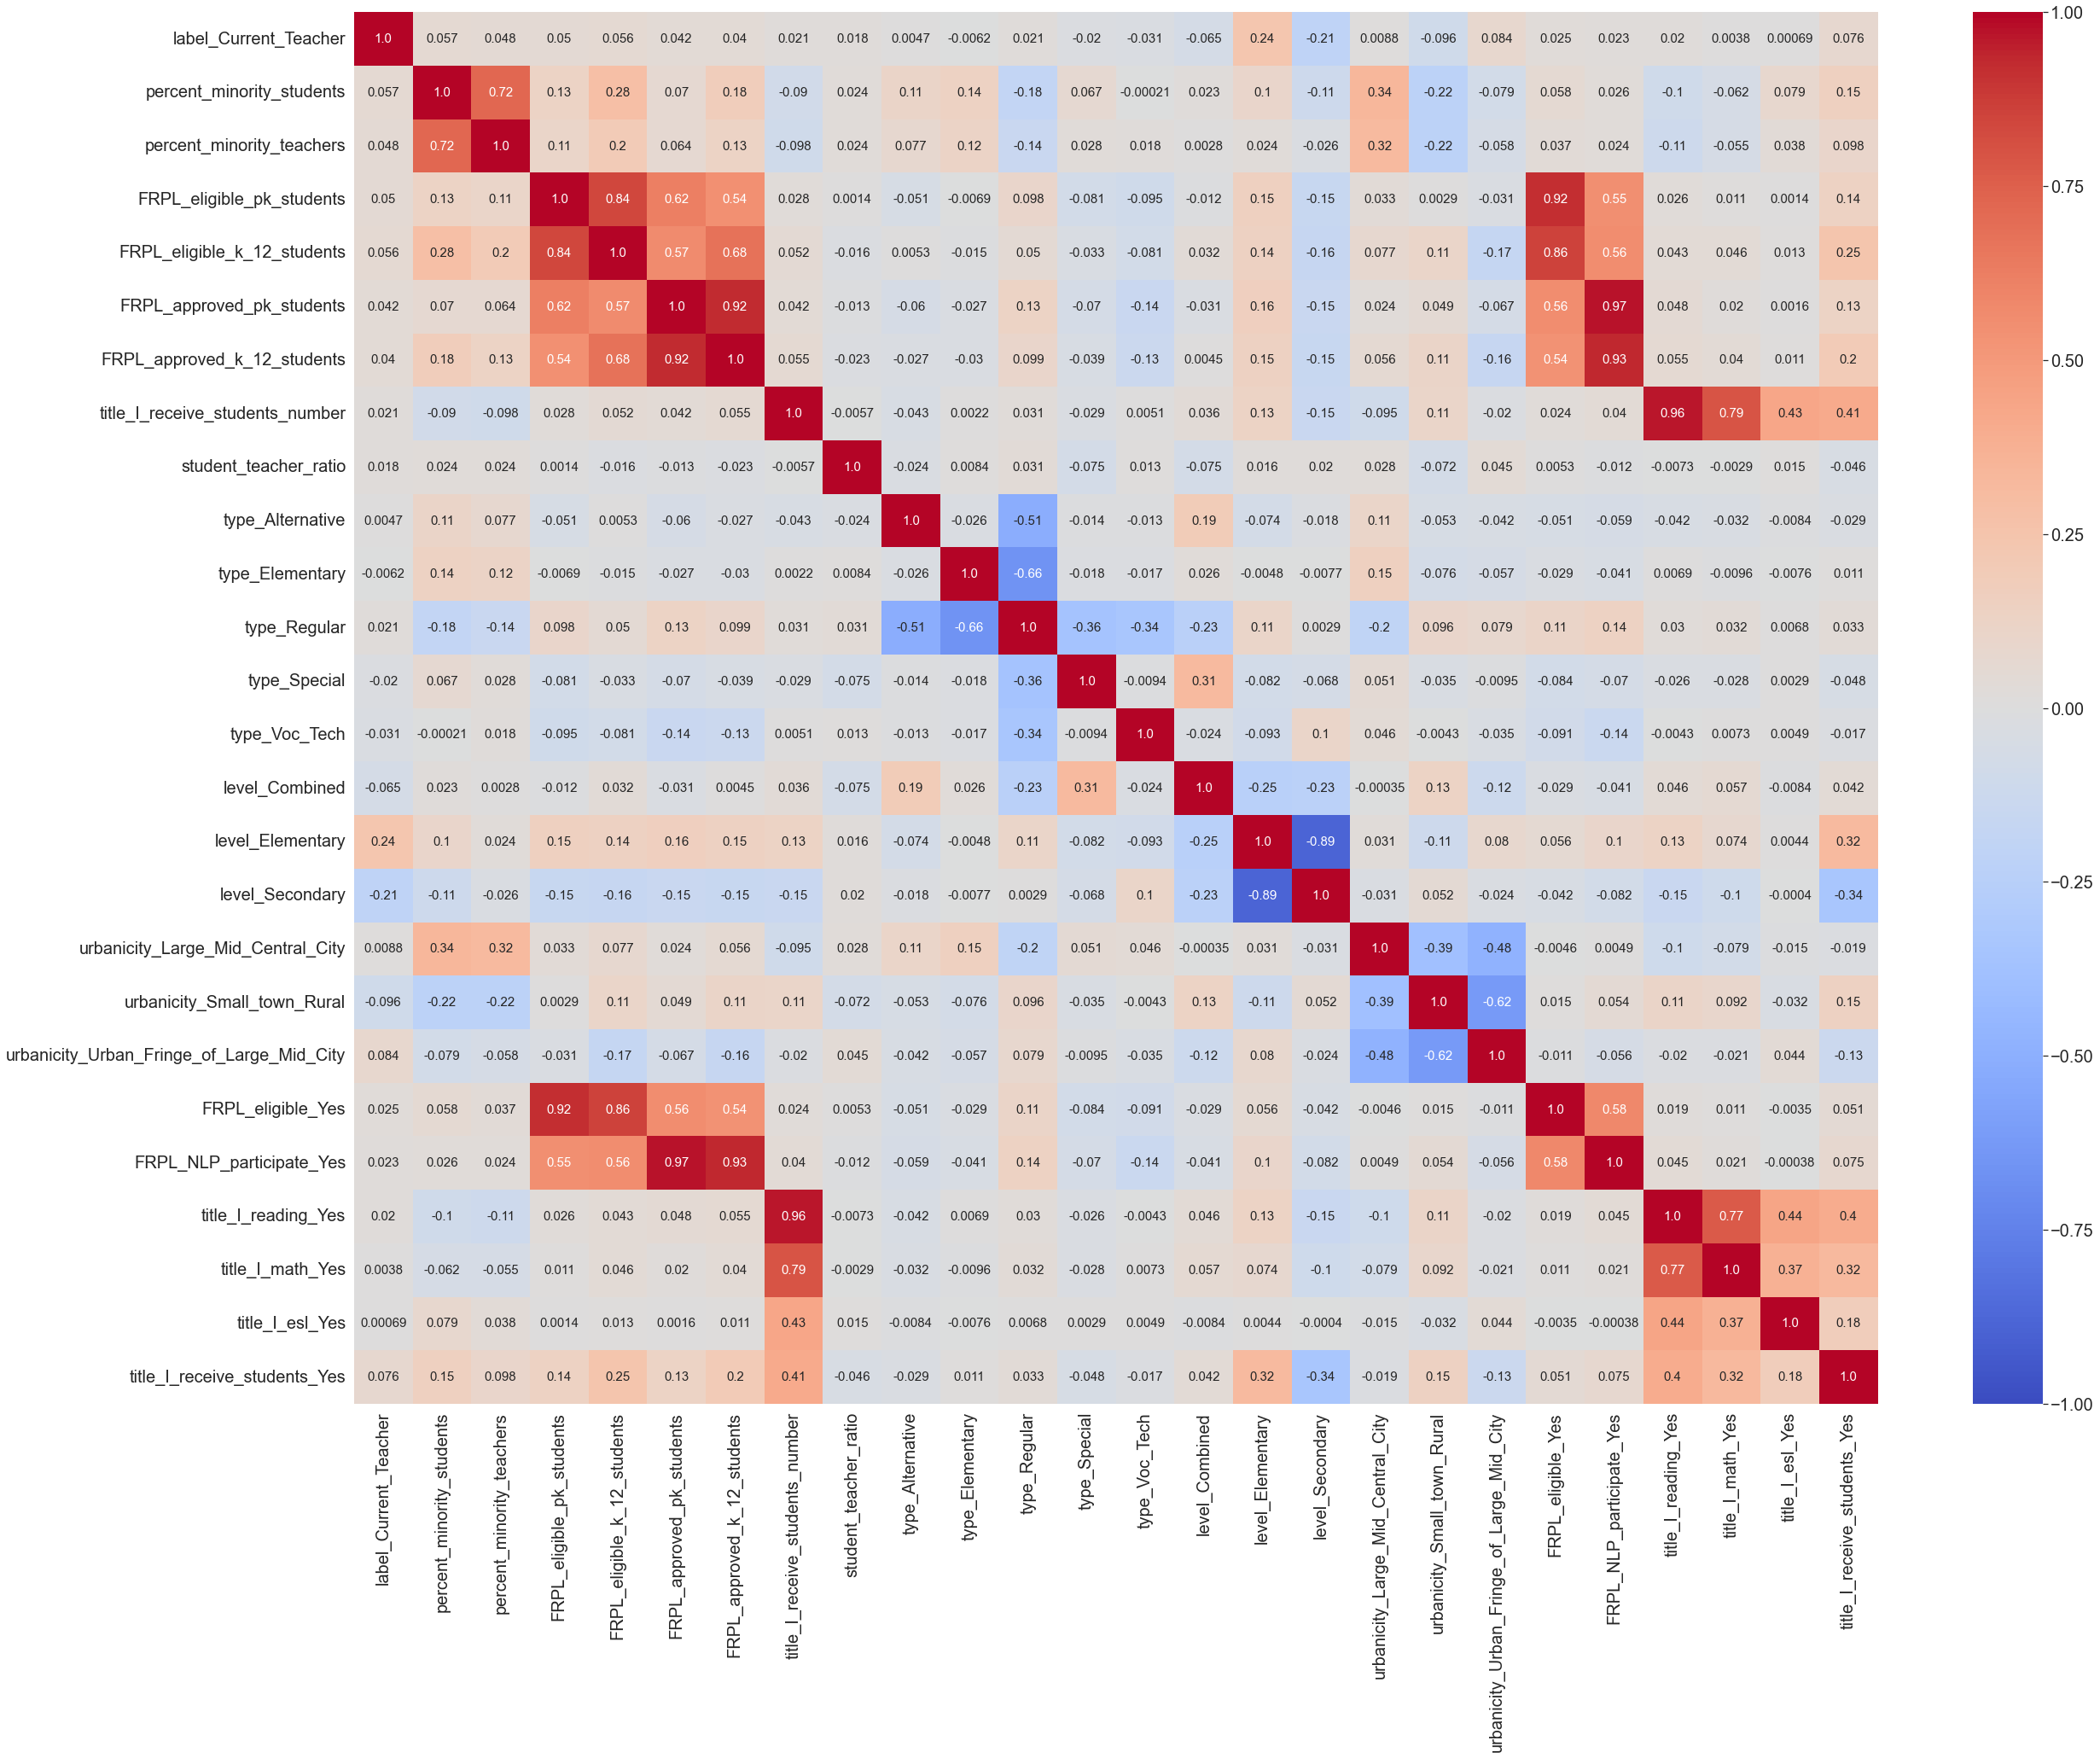

In [75]:
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

df_s1=df_r.corr()
plt.figure(figsize=(40,30))
sns.heatmap(data=df_s1, annot=True, annot_kws={"size":15}, fmt=".2", cmap='coolwarm', vmin=-1)
plt.show()

In [76]:
pd.DataFrame(df_s1['label_Current_Teacher'].nlargest(6).sort_values(ascending=False))

label_Current_Teacher
label_Current_Teacher                                   1.000000
level_Elementary                                        0.237514
urbanicity_Urban_Fringe_of_Large_Mid_City               0.083934
title_I_receive_students_Yes                            0.075623
percent_minority_students                               0.056925
FRPL_eligible_k_12_students                             0.055700

In [77]:
pd.DataFrame(df_s1['label_Current_Teacher'].nsmallest(5))

label_Current_Teacher
level_Secondary                          -0.207980
urbanicity_Small_town_Rural              -0.096131
level_Combined                           -0.064510
type_Voc_Tech                            -0.030788
type_Special                             -0.019935

Public School general and poverty proxy information have the levels of the schools where the teachers are teaching as the significant correlation for positive and negative correlations, with similarly weak linear relationship. As teachers work in a school `level_Elementary` tend to continue teaching, teachers work in a school `level_Secondary` tend to leave their teaching job.

### Public Principal and Public District Incentive Policy ###
- Features: `deg_highest`, `race_p`, `gender_p`, `age_p`, `salary`, `yrs_princpl_this_sch`, `yrs_princpl_oth_schls`, `yrs_tchng_before_princpl`, `yrs_tchng_since_princpl`, `incentives_certification`, `incentives_excellence`, `incentives_prof_dev`, `incentives_location`, `incentives_reten`, `incentives_reten_gen_elem`, `incentives_reten_spec_ed`, `incentives_reten_english`, `incentives_reten_soc_studies`, `incentives_reten_STEM_comp_sci`, `incentives_reten_STEM_math`, `incentives_reten_STEM_phys_sci`, `incentives_reten_STEM_biology`, `incentives_reten_esl`, `incentives_reten_foreign_lang`, `incentives_reten_music_art`, `incentives_reten_voc_ed`

In [78]:
cols=['label', 'A0225', 'RACETH_P', 'A0227', 'AGE_P', 'A0226', 'A0053', 'A0054', 'A0055', 'A0056', 'S1611', 'S1612', 'S1613', 'S1614', 'S1615', 'S1616', 'S1617', 'S1618', 'S1619', 'S1620', 'S1621', 'S1622', 'S1623', 'S1624', 'S1625', 'S1626', 'S1627']
cols_new=['label_Current_Teacher', 'deg_highest', 'race_p', 'gender_p', 'age_p', 'salary', 'yrs_princpl_this_sch', 'yrs_princpl_oth_schls', 'yrs_tchng_before_princpl', 'yrs_tchng_since_princpl', 'incentives_certification', 'incentives_excellence', 'incentives_prof_dev', 'incentives_location', 'incentives_reten', 'incentives_reten_gen_elem', 'incentives_reten_spec_ed', 'incentives_reten_english', 'incentives_reten_soc_studies', 'incentives_reten_STEM_comp_sci', 'incentives_reten_STEM_math', 'incentives_reten_STEM_phys_sci', 'incentives_reten_STEM_biology', 'incentives_reten_esl', 'incentives_reten_foreign_lang', 'incentives_reten_music_art', 'incentives_reten_voc_ed']
cols_dummies=['deg_highest', 'race_p', 'gender_p', 'incentives_certification', 'incentives_excellence', 'incentives_prof_dev', 'incentives_location', 'incentives_reten', 'incentives_reten_gen_elem', 'incentives_reten_spec_ed', 'incentives_reten_english', 'incentives_reten_soc_studies', 'incentives_reten_STEM_comp_sci', 'incentives_reten_STEM_math', 'incentives_reten_STEM_phys_sci', 'incentives_reten_STEM_biology', 'incentives_reten_esl', 'incentives_reten_foreign_lang', 'incentives_reten_music_art', 'incentives_reten_voc_ed']
cols_drop=['race_p_1', 'race_p_2', 'race_p_3', 'race_p_5', 'gender_p_1', 'incentives_certification_2', 'incentives_certification_-9', 'incentives_excellence_2', 'incentives_excellence_-9', 'incentives_prof_dev_2', 'incentives_prof_dev_-9', 'incentives_location_2', 'incentives_location_-9', 'incentives_reten_2', 'incentives_reten_-9', 'incentives_reten_gen_elem_2', 'incentives_reten_gen_elem_-8', 'incentives_reten_gen_elem_-9', 'incentives_reten_spec_ed_2', 'incentives_reten_spec_ed_-8', 'incentives_reten_spec_ed_-9', 'incentives_reten_english_2', 'incentives_reten_english_-8', 'incentives_reten_english_-9', 'incentives_reten_soc_studies_2', 'incentives_reten_soc_studies_-8', 'incentives_reten_soc_studies_-9', 'incentives_reten_STEM_comp_sci_2', 'incentives_reten_STEM_comp_sci_-8', 'incentives_reten_STEM_comp_sci_-9', 'incentives_reten_STEM_math_2', 'incentives_reten_STEM_math_-8', 'incentives_reten_STEM_math_-9', 'incentives_reten_STEM_phys_sci_2', 'incentives_reten_STEM_phys_sci_-8', 'incentives_reten_STEM_phys_sci_-9', 'incentives_reten_STEM_biology_2', 'incentives_reten_STEM_biology_-8', 'incentives_reten_STEM_biology_-9', 'incentives_reten_esl_2', 'incentives_reten_esl_-8', 'incentives_reten_esl_-9', 'incentives_reten_foreign_lang_2', 'incentives_reten_foreign_lang_-8', 'incentives_reten_foreign_lang_-9', 'incentives_reten_music_art_2', 'incentives_reten_music_art_-8', 'incentives_reten_music_art_-9', 'incentives_reten_voc_ed_2', 'incentives_reten_voc_ed_-8', 'incentives_reten_voc_ed_-9']
names={'race_p_4': 'race_p_White', 'gender_p_2': 'gender_p_Female', 'incentives_certification_1': 'incentives_certification_Yes', 'incentives_excellence_1': 'incentives_excellence_Yes', 'incentives_prof_dev_1': 'incentives_prof_dev_Yes', 'incentives_location_1': 'incentives_location_Yes', 'incentives_reten_1': 'incentives_reten_Yes', 'incentives_reten_gen_elem_1': 'incentives_reten_gen_elem_Yes', 'incentives_reten_spec_ed_1': 'incentives_reten_spec_ed_Yes', 'incentives_reten_english_1': 'incentives_reten_english_Yes', 'incentives_reten_soc_studies_1': 'incentives_reten_soc_studies_Yes', 'incentives_reten_STEM_comp_sci_1': 'incentives_reten_STEM_comp_sci_Yes', 'incentives_reten_STEM_math_1': 'incentives_reten_STEM_math_Yes', 'incentives_reten_STEM_phys_sci_1': 'incentives_reten_STEM_phys_sci_Yes', 'incentives_reten_STEM_biology_1': 'incentives_reten_STEM_biology_Yes', 'incentives_reten_esl_1': 'incentives_reten_esl_Yes', 'incentives_reten_foreign_lang_1': 'incentives_reten_foreign_lang_Yes', 'incentives_reten_music_art_1': 'incentives_reten_music_art_Yes', 'incentives_reten_voc_ed_1': 'incentives_reten_voc_ed_Yes'}

In [79]:
ren=dict(zip(cols, cols_new))
df_r=df[cols].copy()
df_r.rename(columns=ren, inplace=True)

In [80]:
keys=np.sort(df_r.deg_highest.unique())
values=['Associate', 'Bachelors', 'Masters', 'Educational_Specialist', 'Doctorate']
ren=dict(zip(keys, values))
df_r.deg_highest=df_r.deg_highest.map(ren)

In [81]:
df_r=pd.get_dummies(df_r, columns=cols_dummies, prefix=cols_dummies)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

df_r.drop(cols_drop, axis=1, inplace=True)
# df_r.columns

df_r.rename(columns=names, inplace=True)
print([ index+', '+str(count) for index,count in zip(df_r.isna().sum().index, df_r.isna().sum()) if count != 0])

[]
[]


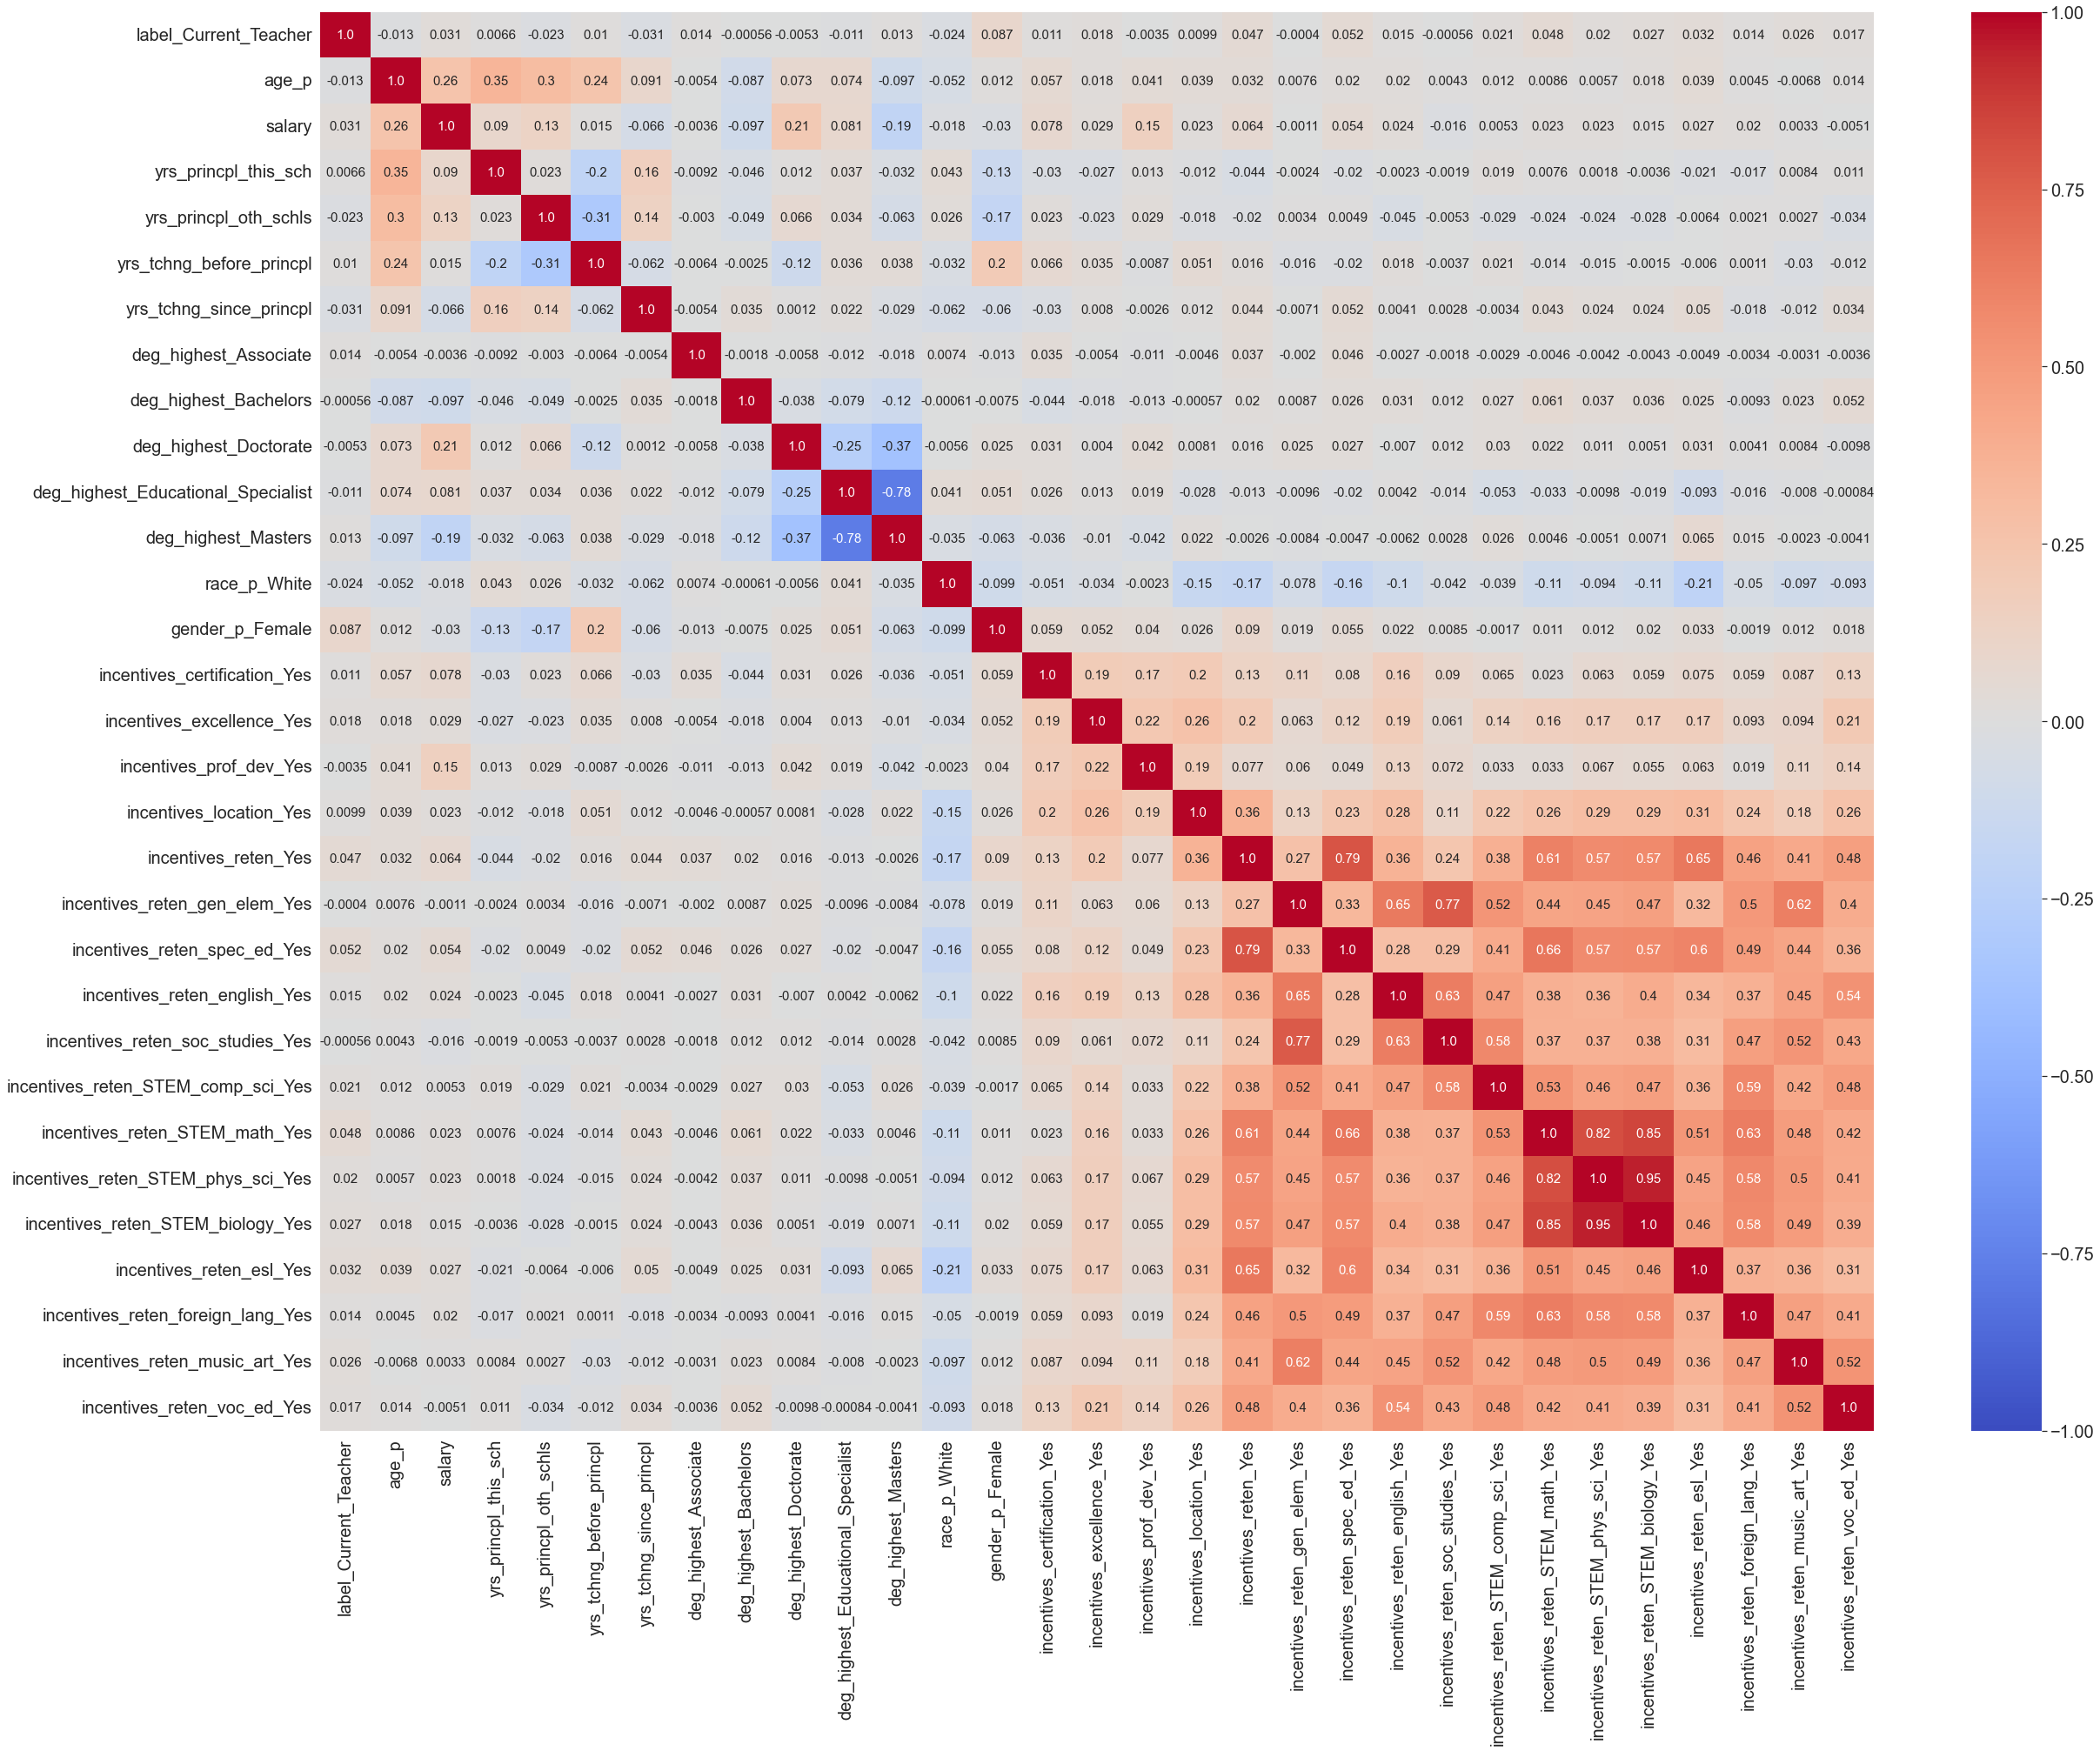

In [82]:
plt.rcParams['axes.titlesize']=18
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

df_p1=df_r.corr()
plt.figure(figsize=(40,30))
sns.heatmap(data=df_p1, annot=True, annot_kws={"size":15}, fmt=".2", cmap='coolwarm', vmin=-1)
plt.show()

In [83]:
pd.DataFrame(df_p1['label_Current_Teacher'].nlargest(6).sort_values(ascending=False))

label_Current_Teacher
label_Current_Teacher                        1.000000
gender_p_Female                              0.087117
incentives_reten_spec_ed_Yes                 0.051876
incentives_reten_STEM_math_Yes               0.048123
incentives_reten_Yes                         0.046877
incentives_reten_esl_Yes                     0.031850

In [84]:
pd.DataFrame(df_p1['label_Current_Teacher'].nsmallest(5))

label_Current_Teacher
yrs_tchng_since_princpl                         -0.030685
race_p_White                                    -0.024051
yrs_princpl_oth_schls                           -0.023245
age_p                                           -0.012828
deg_highest_Educational_Specialist              -0.010645

In general, Public Principal information and Public District incentive policy do not show correlations between the features and Current teacher status. 

## Summary ##

In [85]:
df_c=pd.DataFrame({'feature': df_t1.label_Current_Teacher.index.values, 'r_value': df_t1.label_Current_Teacher, 'location': 'Public Teacher #1'})
temp=pd.DataFrame({'feature': df_t2.label_Current_Teacher.index.values, 'r_value': df_t2.label_Current_Teacher, 'location': 'Public Teacher #2'})
df_c=pd.concat([df_c, temp], ignore_index=True)
temp=pd.DataFrame({'feature': df_t3.label_Current_Teacher.index.values, 'r_value': df_t3.label_Current_Teacher, 'location': 'Public Teacher #3'})
df_c=pd.concat([df_c, temp], ignore_index=True)
temp=pd.DataFrame({'feature': df_s1.label_Current_Teacher.index.values, 'r_value': df_s1.label_Current_Teacher, 'location': 'Public School'})
df_c=pd.concat([df_c, temp], ignore_index=True)
temp=pd.DataFrame({'feature': df_p1.label_Current_Teacher.index.values, 'r_value': df_p1.label_Current_Teacher, 'location': 'Public Principal, Incentive Policy'})
df_c=pd.concat([df_c, temp], ignore_index=True)
df_c.drop(df_c[df_c.feature=='label_Current_Teacher'].index, inplace=True)

In [86]:
df_c.sort_values(by='r_value').tail(30).sort_values(by='r_value', ascending=False)

feature   r_value  \
77                             new_teacher_Yes  0.258777   
94                            level_Elementary  0.237514   
45                            ELA_hours_taught  0.138732   
48                        science_hours_taught  0.135584   
46                           math_hours_taught  0.132216   
47                       social_studies_taught  0.126285   
58                    class_org_Self_Contained  0.105001   
65                             teaches_1st_Yes  0.092775   
118                            gender_p_Female  0.087117   
98   urbanicity_Urban_Fringe_of_Large_Mid_City  0.083934   
14                         summer_teaching_Yes  0.082424   
67                             teaches_3rd_Yes  0.079844   
13                             gender_t_Female  0.078965   
104               title_I_receive_students_Yes  0.075623   
5                         number_of_dependents  0.075240   
66                             teaches_2nd_Yes  0.069665   
64                               teaches_k_Yes  0.069379   
69                             teaches_5th_Yes  0.068986   
16                           nonschool_job_Yes  0.065199   
70                             teaches_6th_Yes  0.063164   
37                              pd_stipend_Yes  0.062885   
56                        class_org_Elementary  0.057480   
80                   percent_minority_students  0.056925   
35                            pd_release_t_Yes  0.056877   
83                 FRPL_eligible_k_12_students  0.055700   
59                     class_org_Team_Teaching  0.052148   
125               incentives_reten_spec_ed_Yes  0.051876   
82                   FRPL_eligible_pk_students  0.049929   
68                             teaches_4th_Yes  0.049228   
81                   percent_minority_teachers  0.048455   

                               location  
77                    Public Teacher #3  
94                        Public School  
45                    Public Teacher #3  
48                    Public Teacher #3  
46                    Public Teacher #3  
47                    Public Teacher #3  
58                    Public Teacher #3  
65                    Public Teacher #3  
118  Public Principal, Incentive Policy  
98                        Public School  
14                    Public Teacher #1  
67                    Public Teacher #3  
13                    Public Teacher #1  
104                       Public School  
5                     Public Teacher #1  
66                    Public Teacher #3  
64                    Public Teacher #3  
69                    Public Teacher #3  
16                    Public Teacher #1  
70                    Public Teacher #3  
37                    Public Teacher #2  
56                    Public Teacher #3  
80                        Public School  
35                    Public Teacher #2  
83                        Public School  
59                    Public Teacher #3  
125  Public Principal, Incentive Policy  
82                        Public School  
68                    Public Teacher #3  
81                        Public School

In [87]:
df_c.sort_values(by='r_value').head(30)

feature   r_value           location
51                        public_ft_exp -0.357457  Public Teacher #3
50                   total_teaching_exp -0.357093  Public Teacher #3
1                                 age_t -0.294343  Public Teacher #1
95                      level_Secondary -0.207980      Public School
43                    remin_in_teaching -0.203764  Public Teacher #3
42                         would_be_tch -0.181978  Public Teacher #3
75                     teaches_11th_Yes -0.171054  Public Teacher #3
74                     teaches_10th_Yes -0.170987  Public Teacher #3
55           class_org_Departmentalized -0.166319  Public Teacher #3
76                     teaches_12th_Yes -0.162428  Public Teacher #3
2                 total_yearly_earnings -0.162032  Public Teacher #1
3               school_related_earnings -0.155463  Public Teacher #1
4                       base_salary_amt -0.146667  Public Teacher #1
73                      teaches_9th_Yes -0.142306  Public Teacher #3
60  main_teaching_lastyr_Same_as_thisyr -0.136967  Public Teacher #3
26                           MA_deg_Yes -0.133055  Public Teacher #2
24                           MA_grad_yr -0.107529  Public Teacher #2
97          urbanicity_Small_town_Rural -0.096131      Public School
25    main_tch_fields_cert_type_Regular -0.093737  Public Teacher #2
22                   BA_major_code_STEM -0.075040  Public Teacher #2
11               marital_status_Married -0.074866  Public Teacher #1
10                          region_West -0.067053  Public Teacher #1
93                       level_Combined -0.064510      Public School
52                        public_pt_exp -0.053086  Public Teacher #3
31                          MA2_deg_Yes -0.050238  Public Teacher #2
23                   MA_major_code_STEM -0.047648  Public Teacher #2
32                          EdS_deg_Yes -0.047466  Public Teacher #2
44                 main_teaching_fields -0.046645  Public Teacher #3
34                          Phd_deg_Yes -0.039748  Public Teacher #2
92                        type_Voc_Tech -0.030788      Public School

As all correlations above are aggregated and sorted to examine top 30 positive and negative correlations, Public Teachers teaching experience features are the most significantly related to the teacher’s retention status, Current or Former. 

For the positive correlation, new teachers are the most significantly related to our label, Current teacher. `level_Elementary` shows the highest r-value among other features that are colinearly related to the elementary education range and organization such as `teaches_1st_Yes` or ` class_org_Self_Contained`. Also `ELA_hours_taught`, `science_hours_taught`, `math_hours_taught`, `social_studies_hours_taught` features are only asked to the teachers who teach multiple subjects that is, self-contained class teachers.

For the negative correlation, the years of teaching experience, ` public_ft_exp`, `total_teaching_exp` are the most significantly related to the label. These features are also colinearly related to `age_t` as age increases with the experience, the teachers tend to stop working the teaching job. Also, `level_Secondary` has the similar trend as `level_Elementary` above in that the `level_Secondary`  shows the most strong correlation among the colinearly related features such as `teaches_11th_Yes` or `class_org_Departmentalized`. 
Furthermore, lower salary/earnings such as `total_yearly_earnings`, `school_related_earnings`, and `base_salary_amt` are slighly related to the teachers turnover.